#1. Import Library

In [ ]:
# @title import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Pertama saya import library yang diperlukan untuk proses kedepannnya baik untuk data preparation maupun data understanding

#2. Data Loading

In [ ]:
# @title Data loading
df = pd.read_csv('https://drive.google.com/uc?id=1ThnWQI28p89ywd8UhLkki0st-2BwSDJm')
df

User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]

In [ ]:
# @title melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Melihat informasi dataset

In [ ]:
# @title melihat apakah ada nilai kosong
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Tidak terdapat missing value, sehingga tidak diperlukan penanganan lebih lanjut untuk missing value

In [ ]:
# @title melihat apakah ada nilai duplikat
df.duplicated().sum()

0

Tidak terdapat nilai duplikat, sehingga tidak diperlukan penanganan lebh lanjut untuk data duplikat

In [ ]:
# @title melihat 5 baris pertama dataset
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

#3. Preprocessing

In [ ]:
# @title menghapus kolom yang tidak digunakan yaitu "User ID"
df = df.drop(columns='User ID')
df.head()

Device Model Operating System  App Usage Time (min/day)  \
0  Google Pixel 5          Android                       393   
1       OnePlus 9          Android                       268   
2    Xiaomi Mi 11          Android                       154   
3  Google Pixel 5          Android                       239   
4       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

Drop kolom User ID karena tidak relevan untuk model development dan eda

In [ ]:
# @title melihat nilai unik setiap kolom kategorikal
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"{col}: {df[col].unique()}")

Device Model: ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
Operating System: ['Android' 'iOS']
Gender: ['Male' 'Female']


Saya may melihat nilai unik tiap kolom kategorikal agar saya dapat menentukan metode encoded yang tepat untuk kolom masing-masing

In [ ]:
# @title mengubah kolom kategorikal menjadi numerikal menggunakan label encoder
labencoder = preprocessing.LabelEncoder()
df['Operating System'] = labencoder.fit_transform(df['Operating System'])
df['Gender'] = labencoder.fit_transform(df['Gender'])
df

Device Model  Operating System  App Usage Time (min/day)  \
0        Google Pixel 5                 0                       393   
1             OnePlus 9                 0                       268   
2          Xiaomi Mi 11                 0                       154   
3        Google Pixel 5                 0                       239   
4             iPhone 12                 1                       187   
..                  ...               ...                       ...   
695           iPhone 12                 1                        92   
696        Xiaomi Mi 11                 0                       316   
697      Google Pixel 5                 0                        99   
698  Samsung Galaxy S21                 0                        62   
699           OnePlus 9                 0                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40       1   
1                          42                  944   47       0   
2                          32                  322   42       1   
3                          56                  871   20       1   
4                          58                  988   31       0   
..                        ...                  ...  ...     ...   
695                        26                  381   22       1   
696                        68                 1201   59       1   
697                        22                  457   50       0   
698                        13                  224   44       1   
699                        49                  828   23       0   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 10 columns]

Menggunakan Label Encoder untuk kolom Operating System dan Gender untuk merubah nilai mereka menjadi vektor numerik.

In [ ]:
# @title One hot encoding untuk kolom kategorikal non ordinal
df = df.join(pd.get_dummies(df['Device Model'], dtype=int))
df = df.drop(columns='Device Model')

In [ ]:
df

Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  \
0                   0                       393                         6.4   
1                   0                       268                         4.7   
2                   0                       154                         4.0   
3                   0                       239                         4.8   
4                   1                       187                         4.3   
..                ...                       ...                         ...   
695                 1                        92                         3.9   
696                 0                       316                         6.8   
697                 0                        99                         3.1   
698                 0                        62                         1.7   
699                 0                       212                         5.4   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                       1872                        67                 1122   
1                       1331                        42                  944   
2                        761                        32                  322   
3                       1676                        56                  871   
4                       1367                        58                  988   
..                       ...                       ...                  ...   
695                     1082                        26                  381   
696                     1965                        68                 1201   
697                      942                        22                  457   
698                      431                        13                  224   
699                     1306                        49                  828   

     Age  Gender  User Behavior Class  Google Pixel 5  OnePlus 9  \
0     40       1                    4               1          0   
1     47       0                    3               0          1   
2     42       1                    2               0          0   
3     20       1                    3               1          0   
4     31       0                    3               0          0   
..   ...     ...                  ...             ...        ...   
695   22       1                    2               0          0   
696   59       1                    4               0          0   
697   50       0                    2               1          0   
698   44       1                    1               0          0   
699   23       0                    3               0          1   

     Samsung Galaxy S21  Xiaomi Mi 11  iPhone 12  
0                     0             0          0  
1                     0             0          0  
2                     0             1          0  
3                     0             0          0  
4                     0             0          1  
..                  ...           ...        ...  
695                   0             0          1  
696                   0             1          0  
697                   0             0          0  
698                   1             0          0  
699                   0             0          0  

[700 rows x 14 columns]

lalu selanjutnnya saya melakukkan one hot encoding untuk kolomh device model karena mereka adalah data kategorikal non ordinal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Operating System            700 non-null    int64  
 1   App Usage Time (min/day)    700 non-null    int64  
 2   Screen On Time (hours/day)  700 non-null    float64
 3   Battery Drain (mAh/day)     700 non-null    int64  
 4   Number of Apps Installed    700 non-null    int64  
 5   Data Usage (MB/day)         700 non-null    int64  
 6   Age                         700 non-null    int64  
 7   Gender                      700 non-null    int64  
 8   User Behavior Class         700 non-null    int64  
 9   Google Pixel 5              700 non-null    int64  
 10  OnePlus 9                   700 non-null    int64  
 11  Samsung Galaxy S21          700 non-null    int64  
 12  Xiaomi Mi 11                700 non-null    int64  
 13  iPhone 12                   700 non

#4. Data Understanding(Exploratory Data Analysis)

In [ ]:
# @title Melihat Deskripsi statistik Data menggunakan fungsi describe()
df.describe()

Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  \
count        700.000000                700.000000                  700.000000   
mean           0.208571                271.128571                    5.272714   
std            0.406578                177.199484                    3.068584   
min            0.000000                 30.000000                    1.000000   
25%            0.000000                113.250000                    2.500000   
50%            0.000000                227.500000                    4.900000   
75%            0.000000                434.250000                    7.400000   
max            1.000000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min                 302.000000                 10.000000           102.000000   
25%                 722.250000                 26.000000           373.000000   
50%                1502.500000                 49.000000           823.500000   
75%                2229.500000                 74.000000          1341.000000   
max                2993.000000                 99.000000          2497.000000   

              Age      Gender  User Behavior Class  Google Pixel 5  \
count  700.000000  700.000000           700.000000      700.000000   
mean    38.482857    0.520000             2.990000        0.202857   
std     12.012916    0.499957             1.401476        0.402415   
min     18.000000    0.000000             1.000000        0.000000   
25%     28.000000    0.000000             2.000000        0.000000   
50%     38.000000    1.000000             3.000000        0.000000   
75%     49.000000    1.000000             4.000000        0.000000   
max     59.000000    1.000000             5.000000        1.000000   

        OnePlus 9  Samsung Galaxy S21  Xiaomi Mi 11   iPhone 12  
count  700.000000          700.000000    700.000000  700.000000  
mean     0.190000            0.190000      0.208571    0.208571  
std      0.392581            0.392581      0.406578    0.406578  
min      0.000000            0.000000      0.000000    0.000000  
25%      0.000000            0.000000      0.000000    0.000000  
50%      0.000000            0.000000      0.000000    0.000000  
75%      0.000000            0.000000      0.000000    0.000000  
max      1.000000            1.000000      1.000000    1.000000

setelah dianalisa didapatkan analisa statistik sebagai berikut:
1. **Operating System**: Kolom ini berisi nilai biner (0 atau 1) untuk tipe sistem operasi. Mean sebesar 0.21 menunjukkan bahwa mayoritas data memiliki nilai 0.
2. **App Usage Time**: Waktu rata-rata penggunaan aplikasi adalah 271.13 menit per hari, dengan standar deviasi sebesar 177.20 menit, menunjukkan adanya variasi yang signifikan di antara pengguna.
3. **Screen On Time**: Rata-rata waktu layar menyala adalah 5.27 jam per hari, dengan variasi yang relatif moderat.
4. **Battery Drain**: Penggunaan daya rata-rata adalah 1525.16 mAh per hari, dengan maksimum mencapai 2993 mAh.
5. **Age**: Rata-rata usia pengguna adalah 38.48 tahun, dengan kisaran usia 18–59 tahun.
6. **Gender**: Kolom biner yang hampir seimbang (0 untuk perempuan, 1 untuk laki-laki) dengan rata-rata 0.52.
7. **User Behavior Class**: Rata-rata kelas perilaku pengguna adalah 2.99, mendekati median (3), menunjukkan distribusi yang cukup seimbang.

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


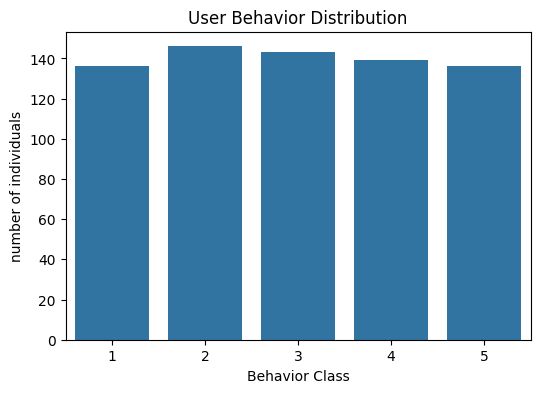

In [ ]:
# @title Melihat distribusi User Behavior
ubehave_counts = df['User Behavior Class'].value_counts()
print(ubehave_counts)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='User Behavior Class')
plt.title('User Behavior Distribution')
plt.xlabel('Behavior Class')
plt.ylabel('number of individuals')
plt.show()

Disini saya mau melihat distribusi User behavior class untuk mengentahui apakah data inbalanced atau tida, dan didapatkan data ini cukup balance dan dapat digunakan

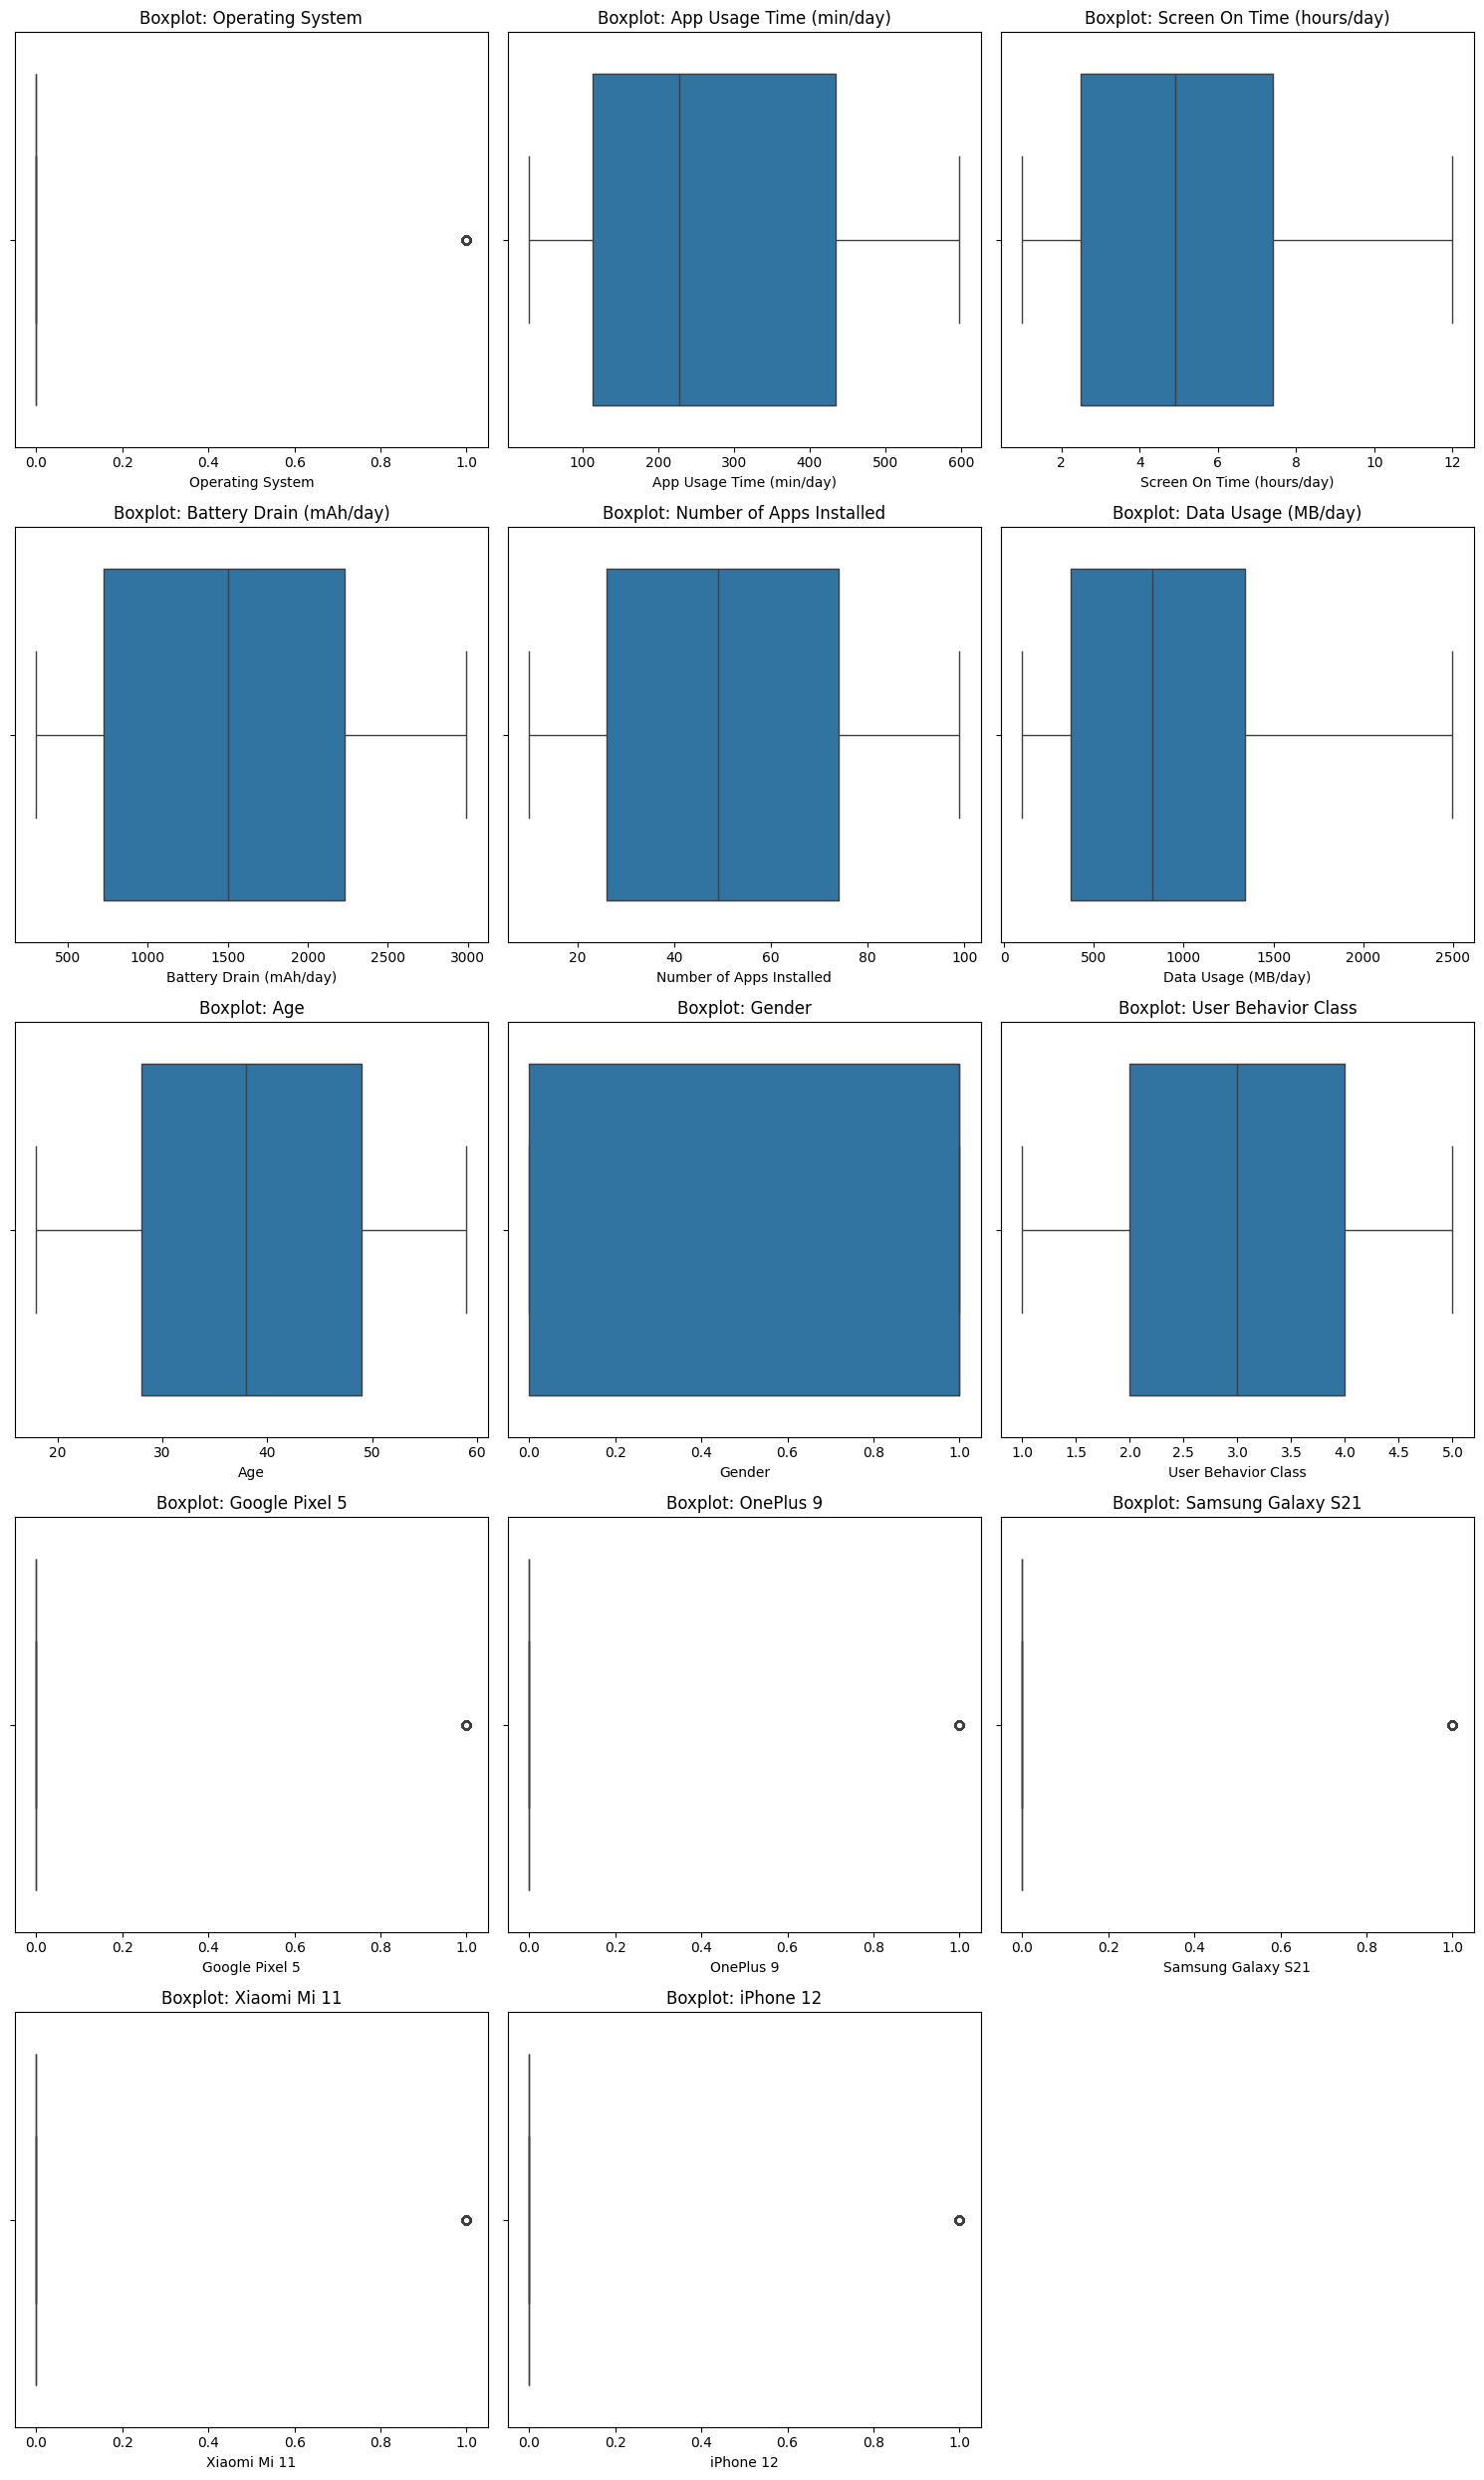

In [ ]:
# @title visualisasi boxplot
numeric_columns = df.select_dtypes(include=[np.number]).columns

n_cols = 3
n_rows = len(numeric_columns) // n_cols + (1 if len(numeric_columns) % n_cols != 0 else 0)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()

plt.show()

setelah divisualisasikan, didapatkan analisa bahwa tidka ada outlier pada data, sehingga data bisa digunakan dengan baik untuk pelatihan model

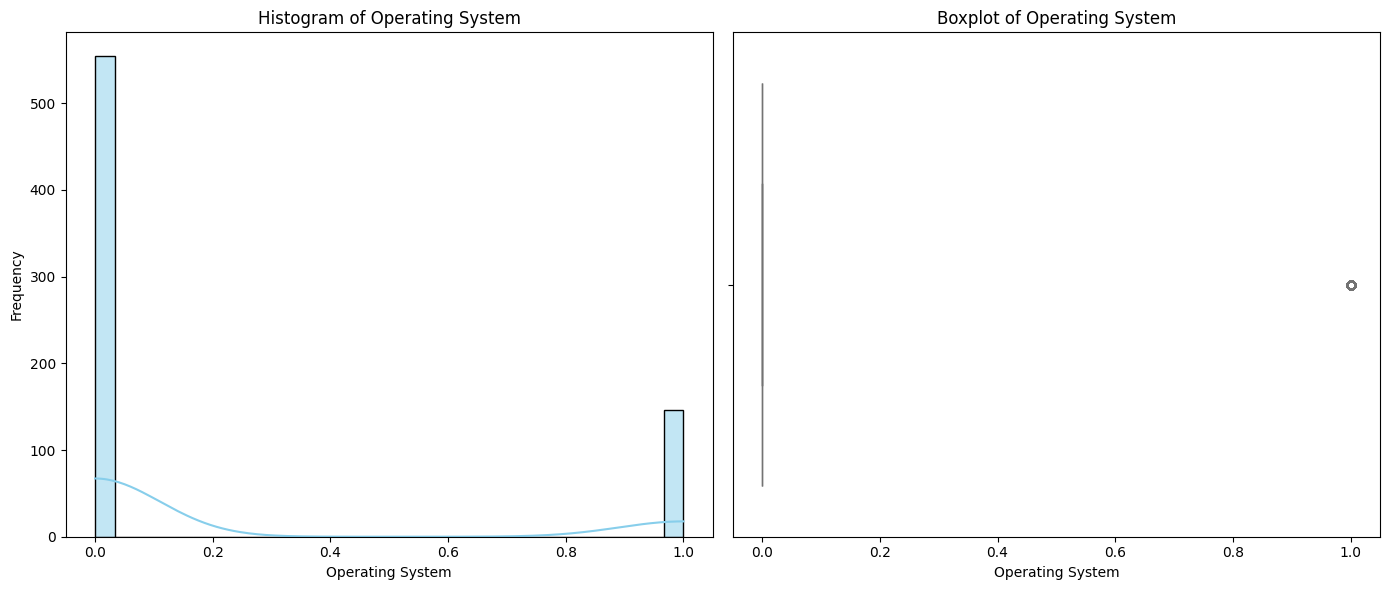

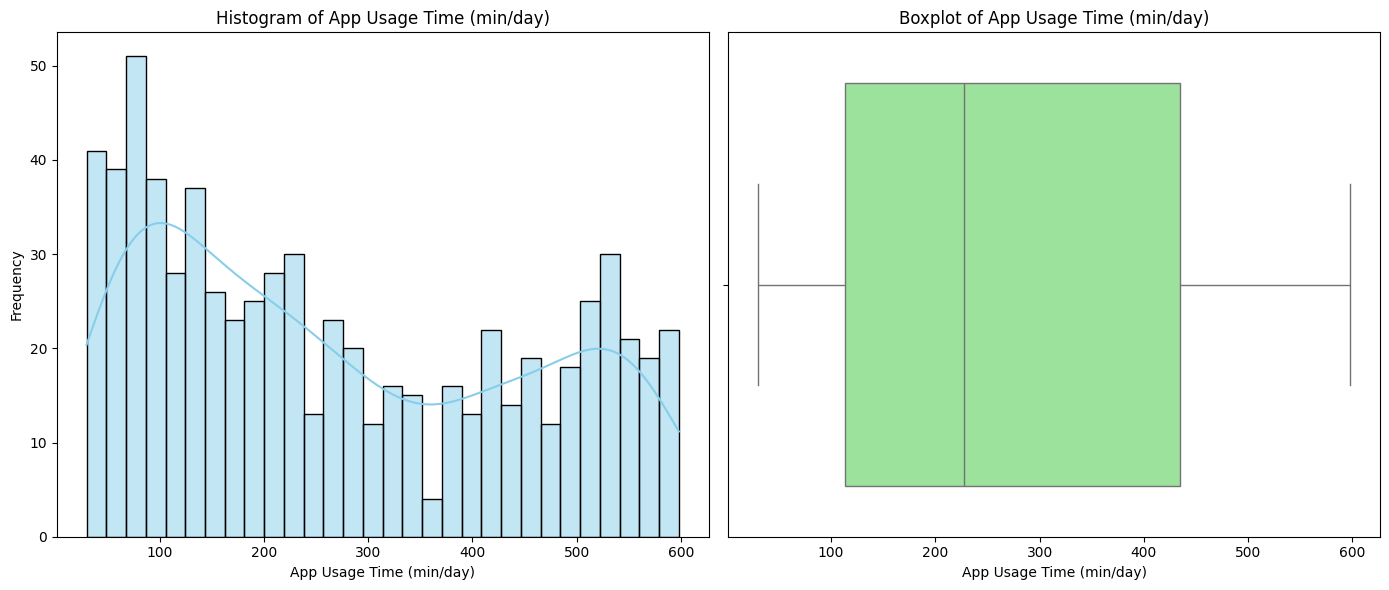

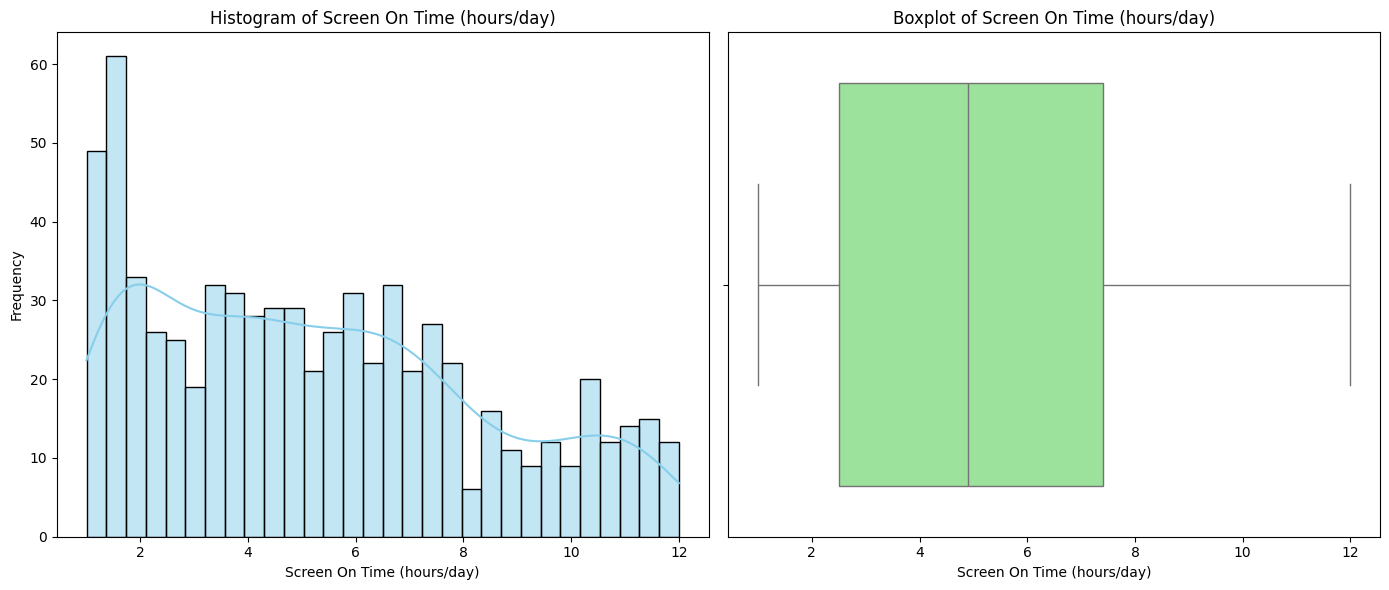

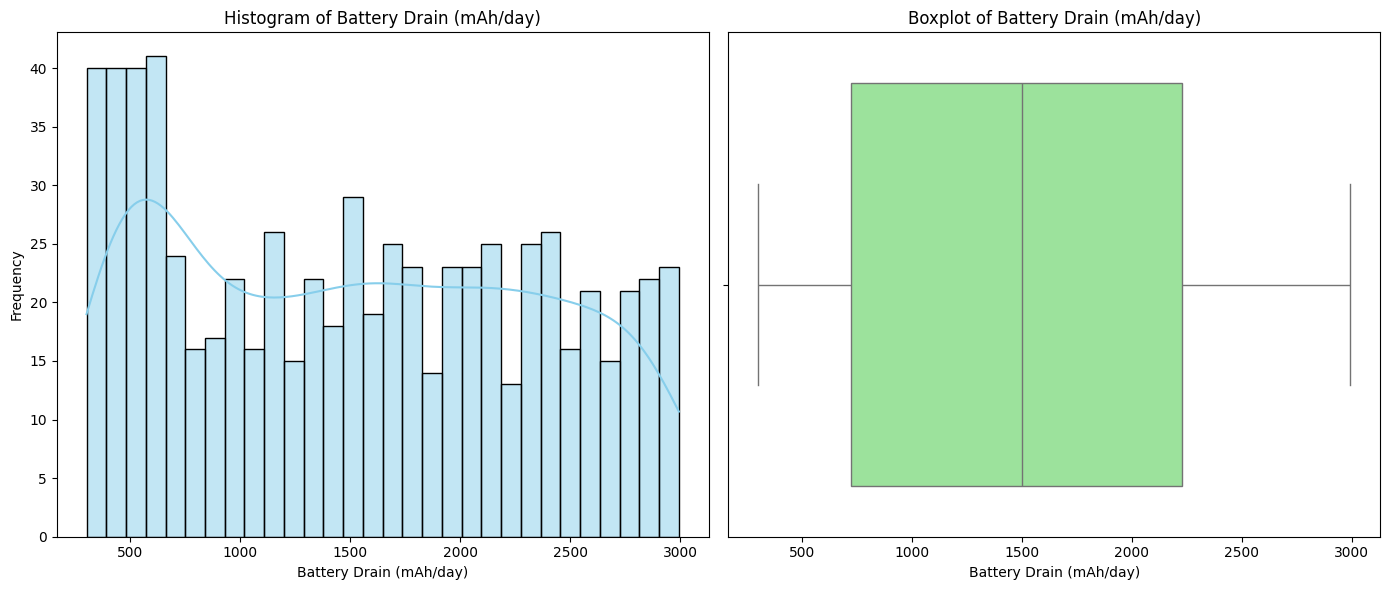

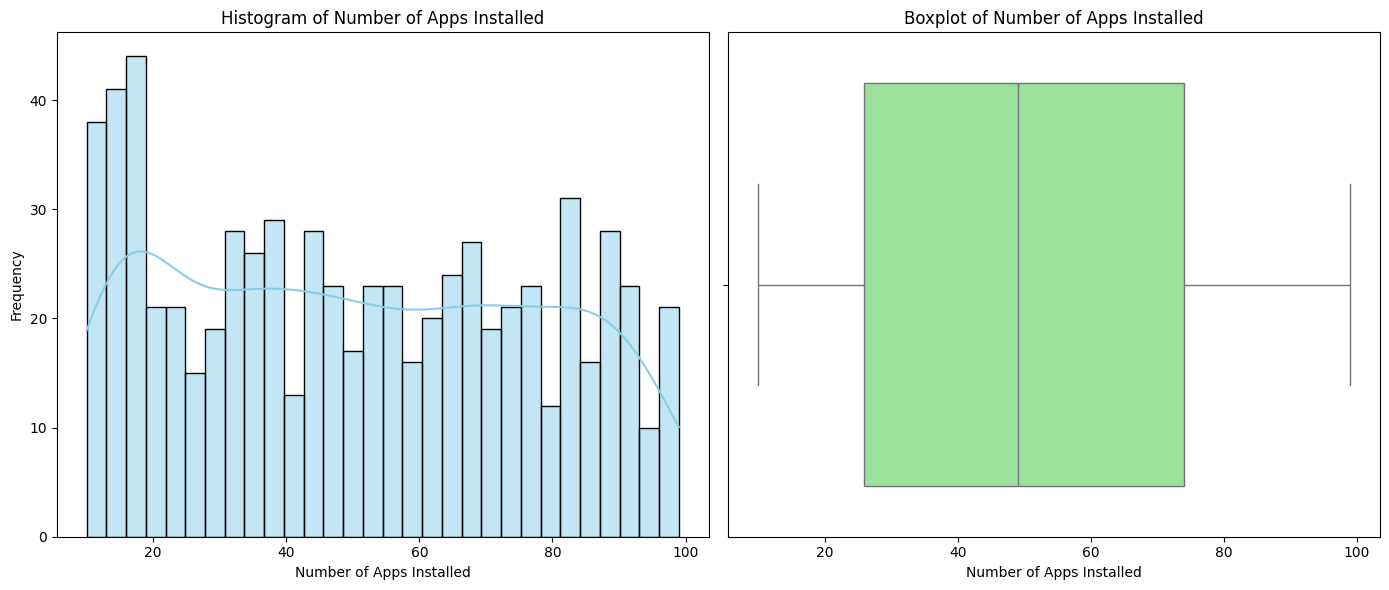

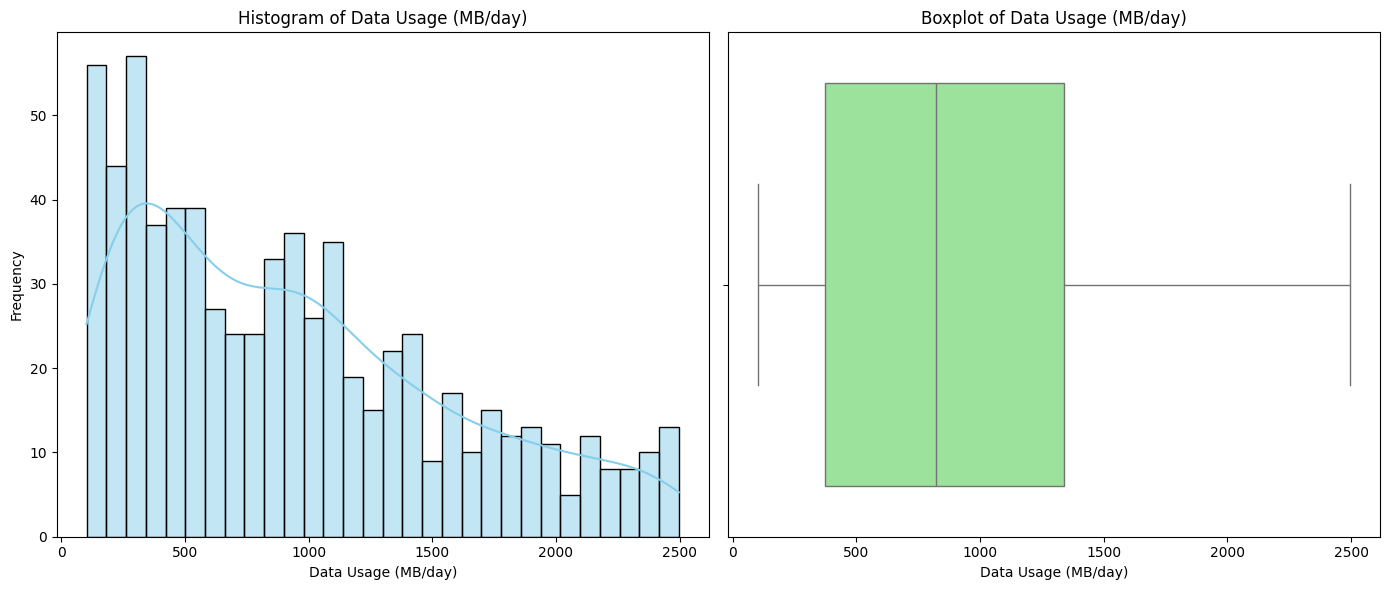

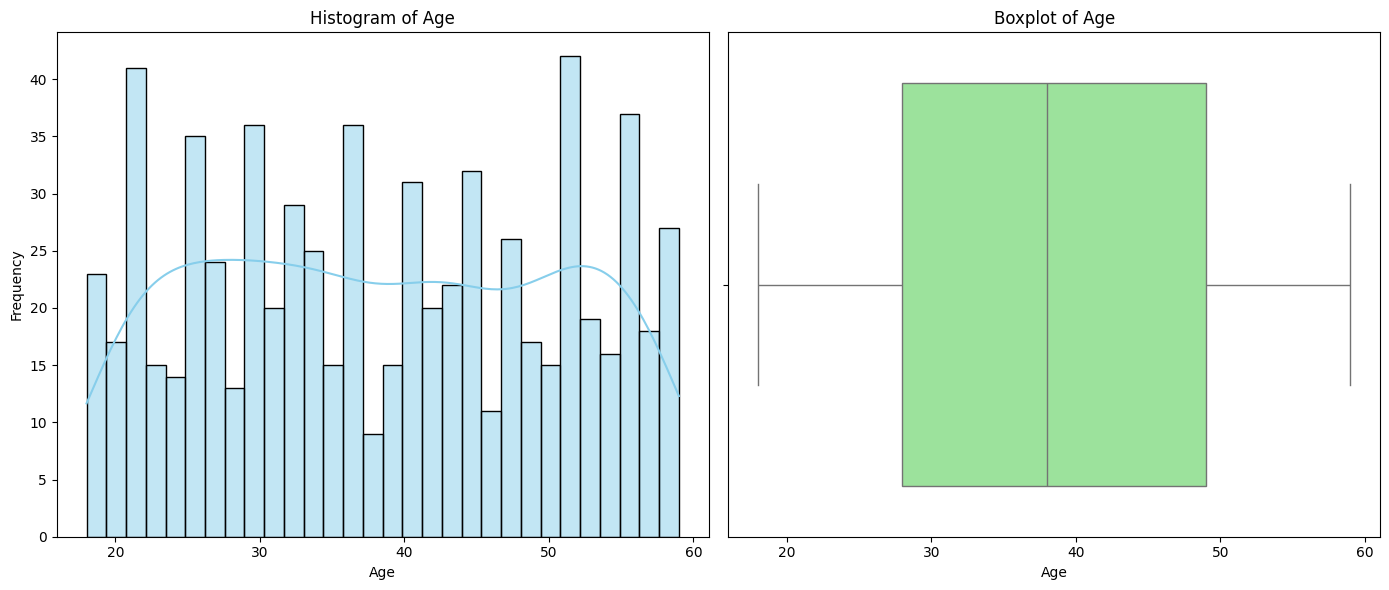

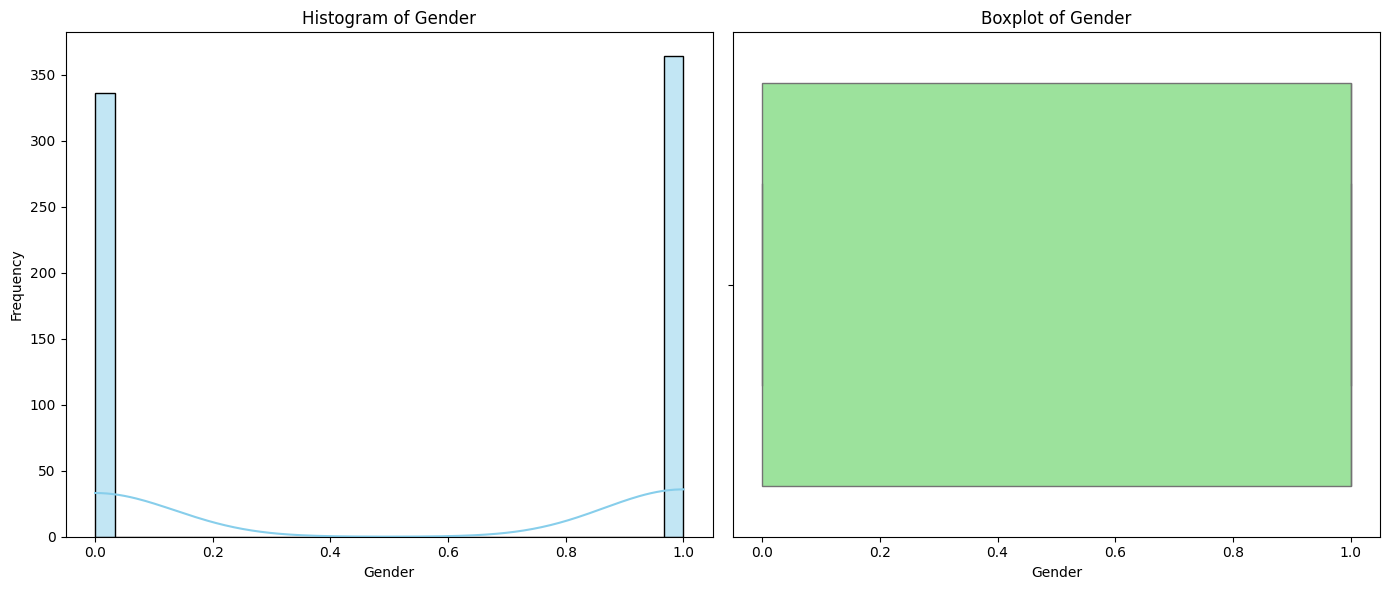

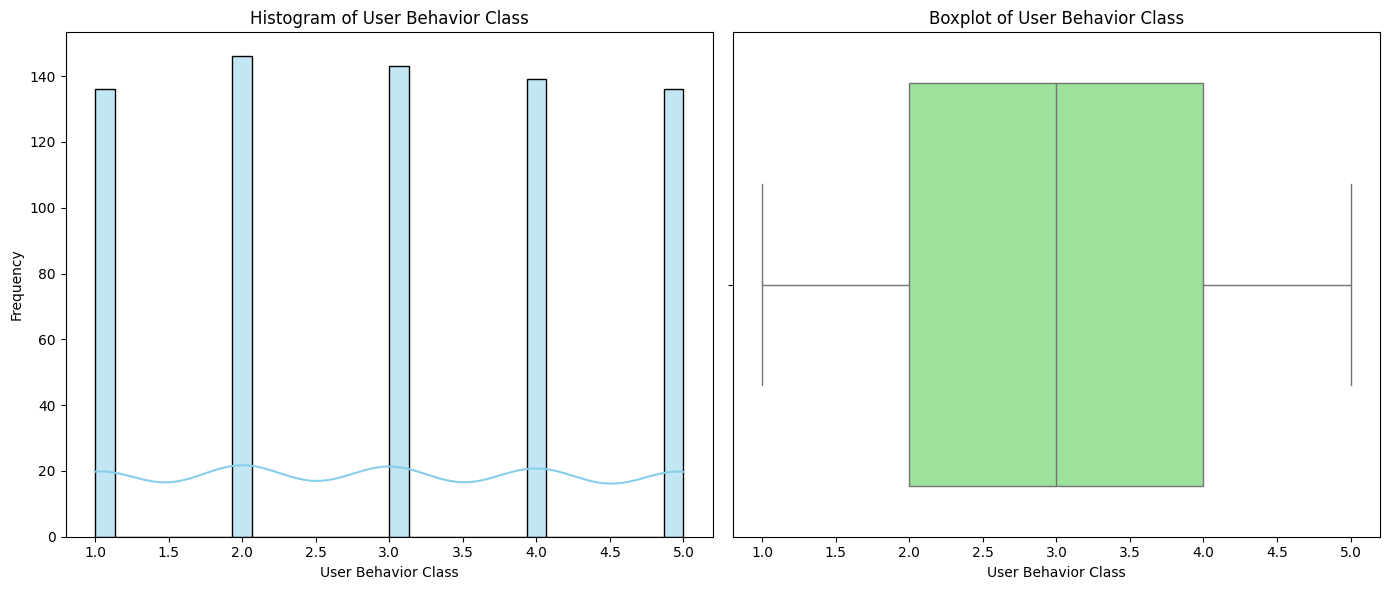

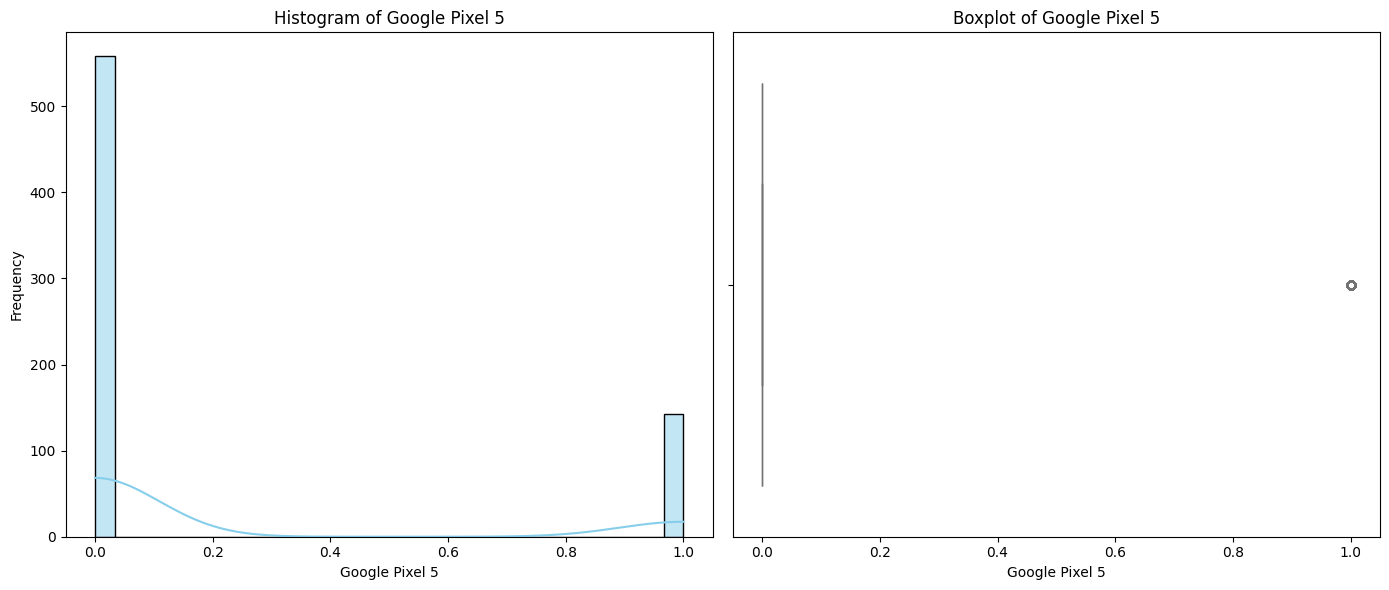

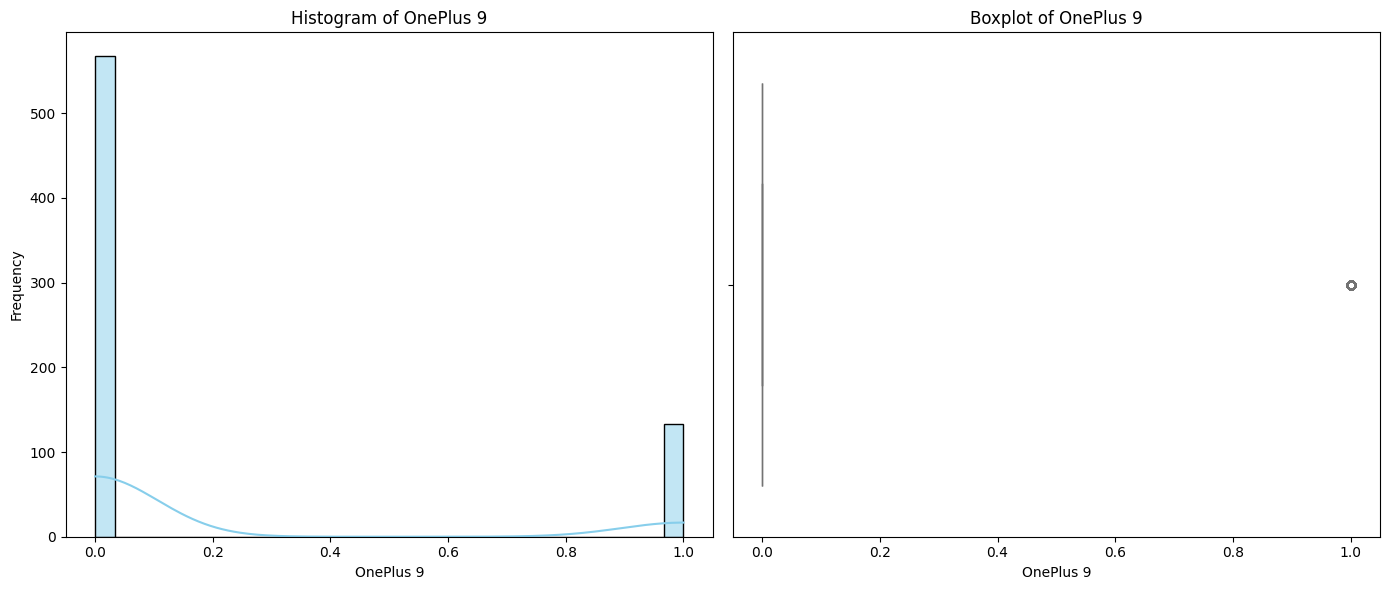

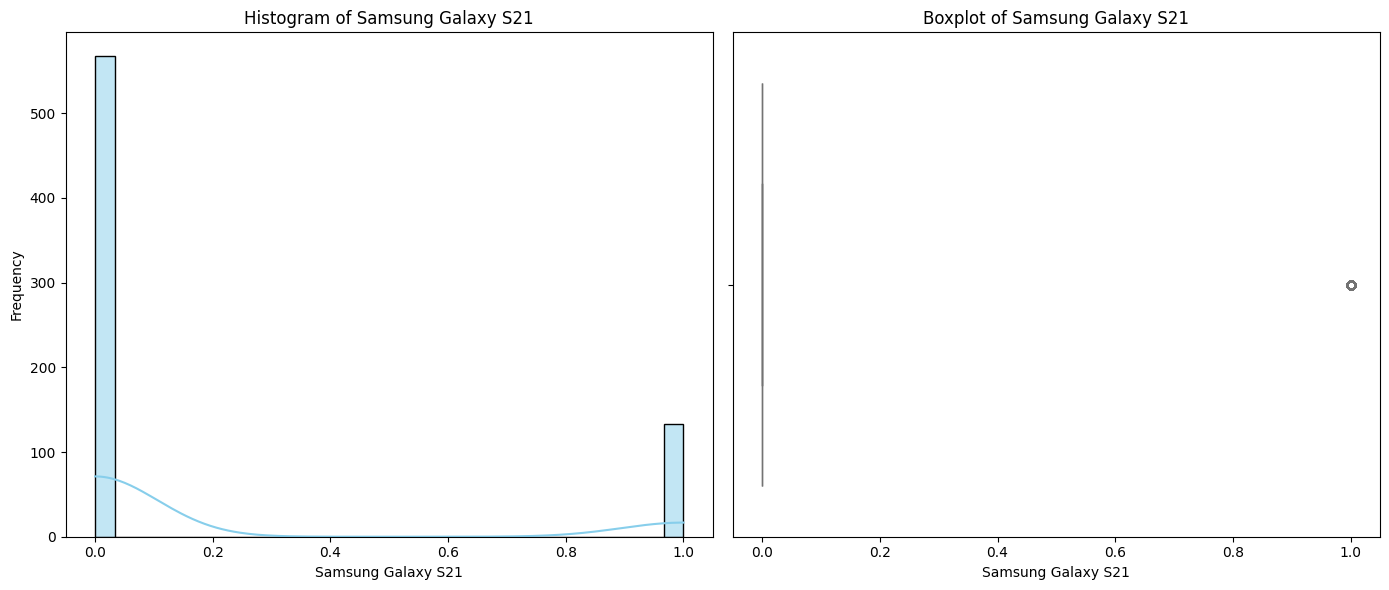

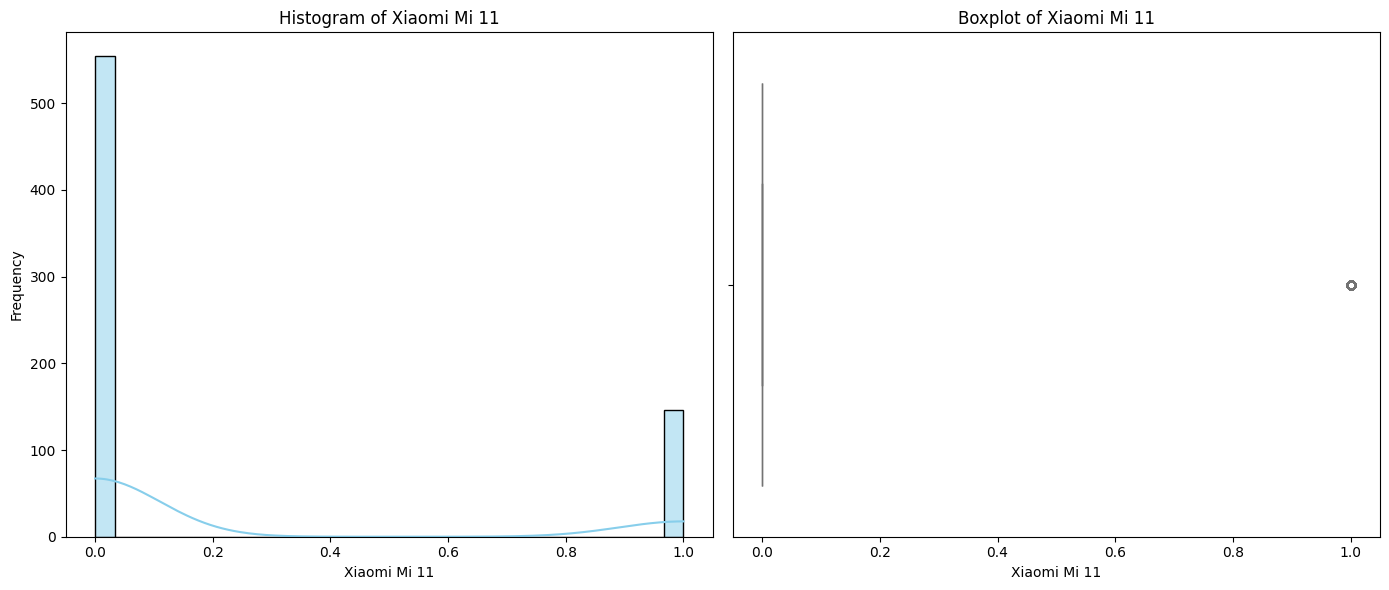

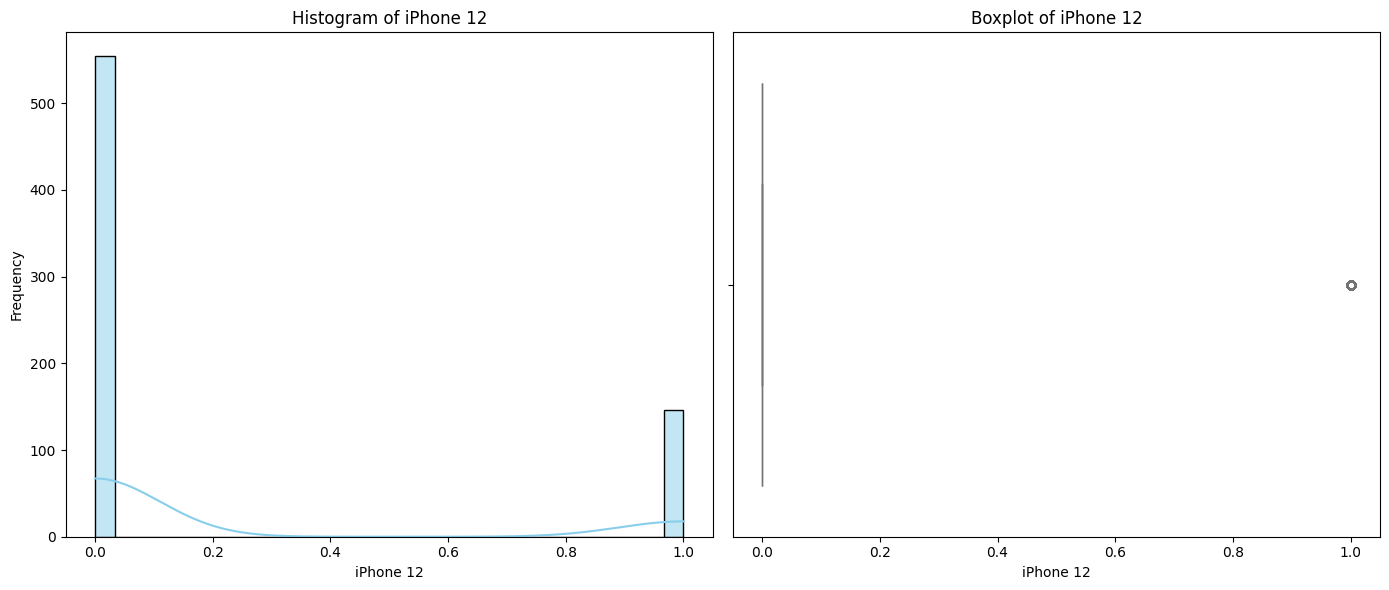

In [ ]:
# @title melihat visualisasi distribusi data
for col in numeric_columns:
    plt.figure(figsize=(14, 6))

    # Subplot untuk Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Subplot untuk Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

Dari visualisasi diatas, didapatkan bahwa distribusi data mayoritas simetrs sehingga memiliki rataan yang cukup baik

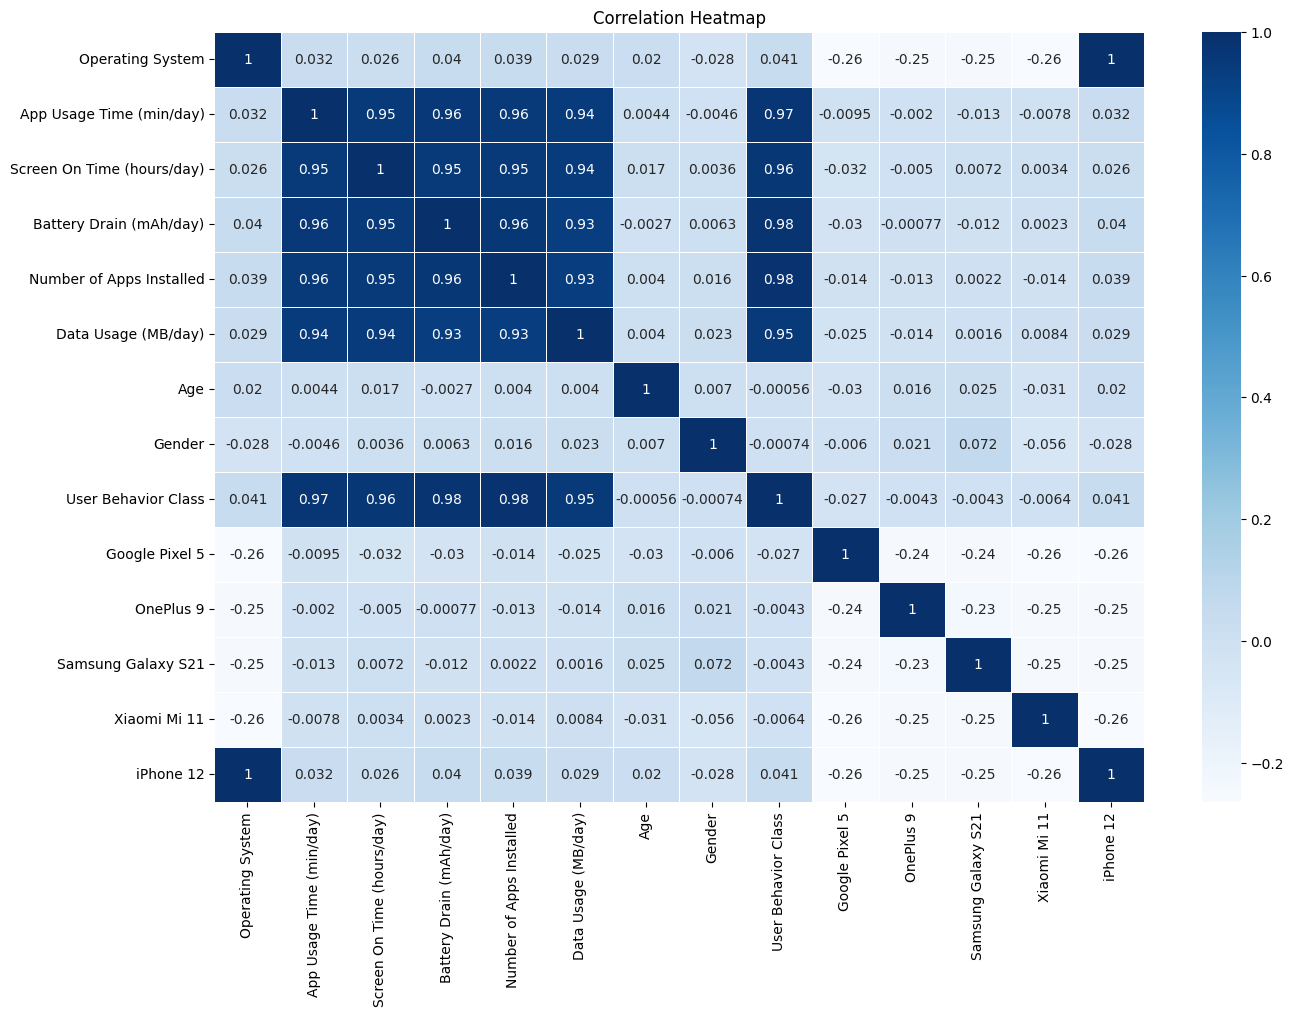

In [ ]:
# @title visualisasi korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Visualisasi heatmap korealasi untuk mengetahui hubungan antar fitur dan label, setalah divisualisasikan didapatkan insight sebagai berikut:
1. **Keterkaitan Antara Waktu Penggunaan, Waktu Layar, dan Variabel Lainnya**:  
   Variabel seperti **waktu penggunaan aplikasi**, **waktu layar**, **pengurasan baterai**, **jumlah aplikasi yang diinstal**, dan **penggunaan data** menunjukkan hubungan positif yang kuat. Semakin tinggi salah satu variabel, semakin tinggi pula variabel lainnya, mencerminkan pola penggunaan yang saling memengaruhi.

2. **Hubungan dengan Kategori Perilaku Pengguna**:  
   Terdapat korelasi positif antara **waktu penggunaan aplikasi**, **waktu layar**, dan **pengurasan baterai** dengan **kategori perilaku pengguna**. Pengguna dengan kebiasaan penggunaan serupa cenderung berada dalam kategori perilaku yang sama.
3. **Hubungan fitur yang terlalu kuat**:
   Terdapat fitur yang memiliki hubungan yang terlalu kuat, yaitu 1(operating system dan iphone 12), hal tersebut kemungkinan besar disebabkan oleh jenis iphone dan operating system yang sama ios, sehingga menimbulkan hubungan yang sama persis, hal tersebut tidak baik untuk model, karena dapat menyebabkan overfiting sehingga saya menggahapus kolom "Iphone 12"

In [ ]:
# @title menghapus kolom Iphone 12
df = df.drop(columns='iPhone 12')
df

Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  \
0                   0                       393                         6.4   
1                   0                       268                         4.7   
2                   0                       154                         4.0   
3                   0                       239                         4.8   
4                   1                       187                         4.3   
..                ...                       ...                         ...   
695                 1                        92                         3.9   
696                 0                       316                         6.8   
697                 0                        99                         3.1   
698                 0                        62                         1.7   
699                 0                       212                         5.4   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                       1872                        67                 1122   
1                       1331                        42                  944   
2                        761                        32                  322   
3                       1676                        56                  871   
4                       1367                        58                  988   
..                       ...                       ...                  ...   
695                     1082                        26                  381   
696                     1965                        68                 1201   
697                      942                        22                  457   
698                      431                        13                  224   
699                     1306                        49                  828   

     Age  Gender  User Behavior Class  Google Pixel 5  OnePlus 9  \
0     40       1                    4               1          0   
1     47       0                    3               0          1   
2     42       1                    2               0          0   
3     20       1                    3               1          0   
4     31       0                    3               0          0   
..   ...     ...                  ...             ...        ...   
695   22       1                    2               0          0   
696   59       1                    4               0          0   
697   50       0                    2               1          0   
698   44       1                    1               0          0   
699   23       0                    3               0          1   

     Samsung Galaxy S21  Xiaomi Mi 11  
0                     0             0  
1                     0             0  
2                     0             1  
3                     0             0  
4                     0             0  
..                  ...           ...  
695                   0             0  
696                   0             1  
697                   0             0  
698                   1             0  
699                   0             0  

[700 rows x 13 columns]

Menghapus kolom "Iphone 12

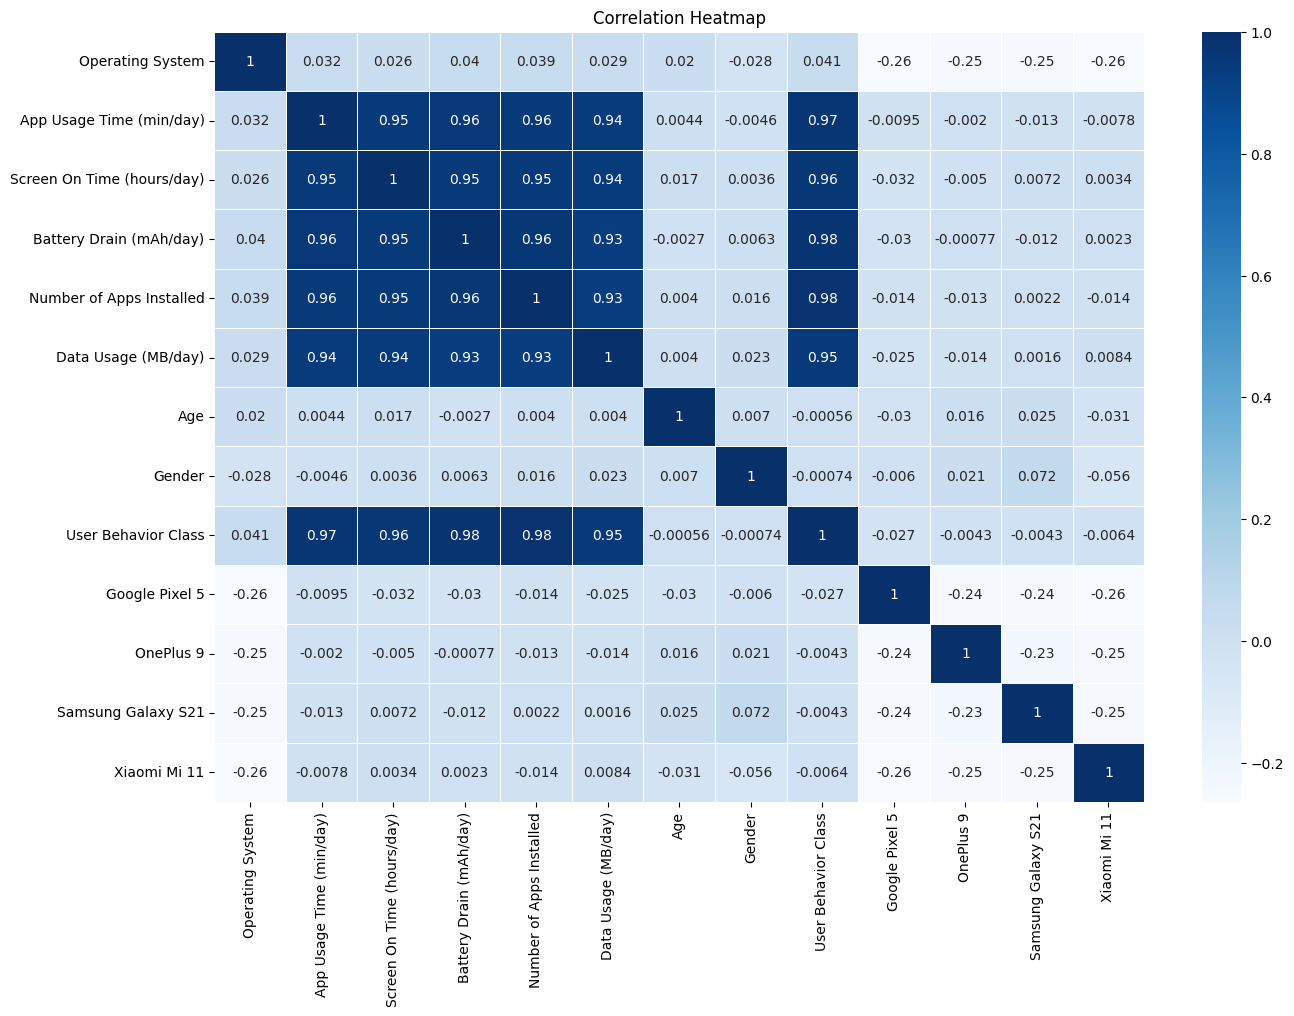

In [ ]:
# @title visualisasi kembali corelation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Setelah dihapus, tidak ada fitur yang memiliki hubungan yang terlalu kuat lagi, sehingga model dapat terhindar dari resiko overfiting

<Figure size 1000x800 with 0 Axes>

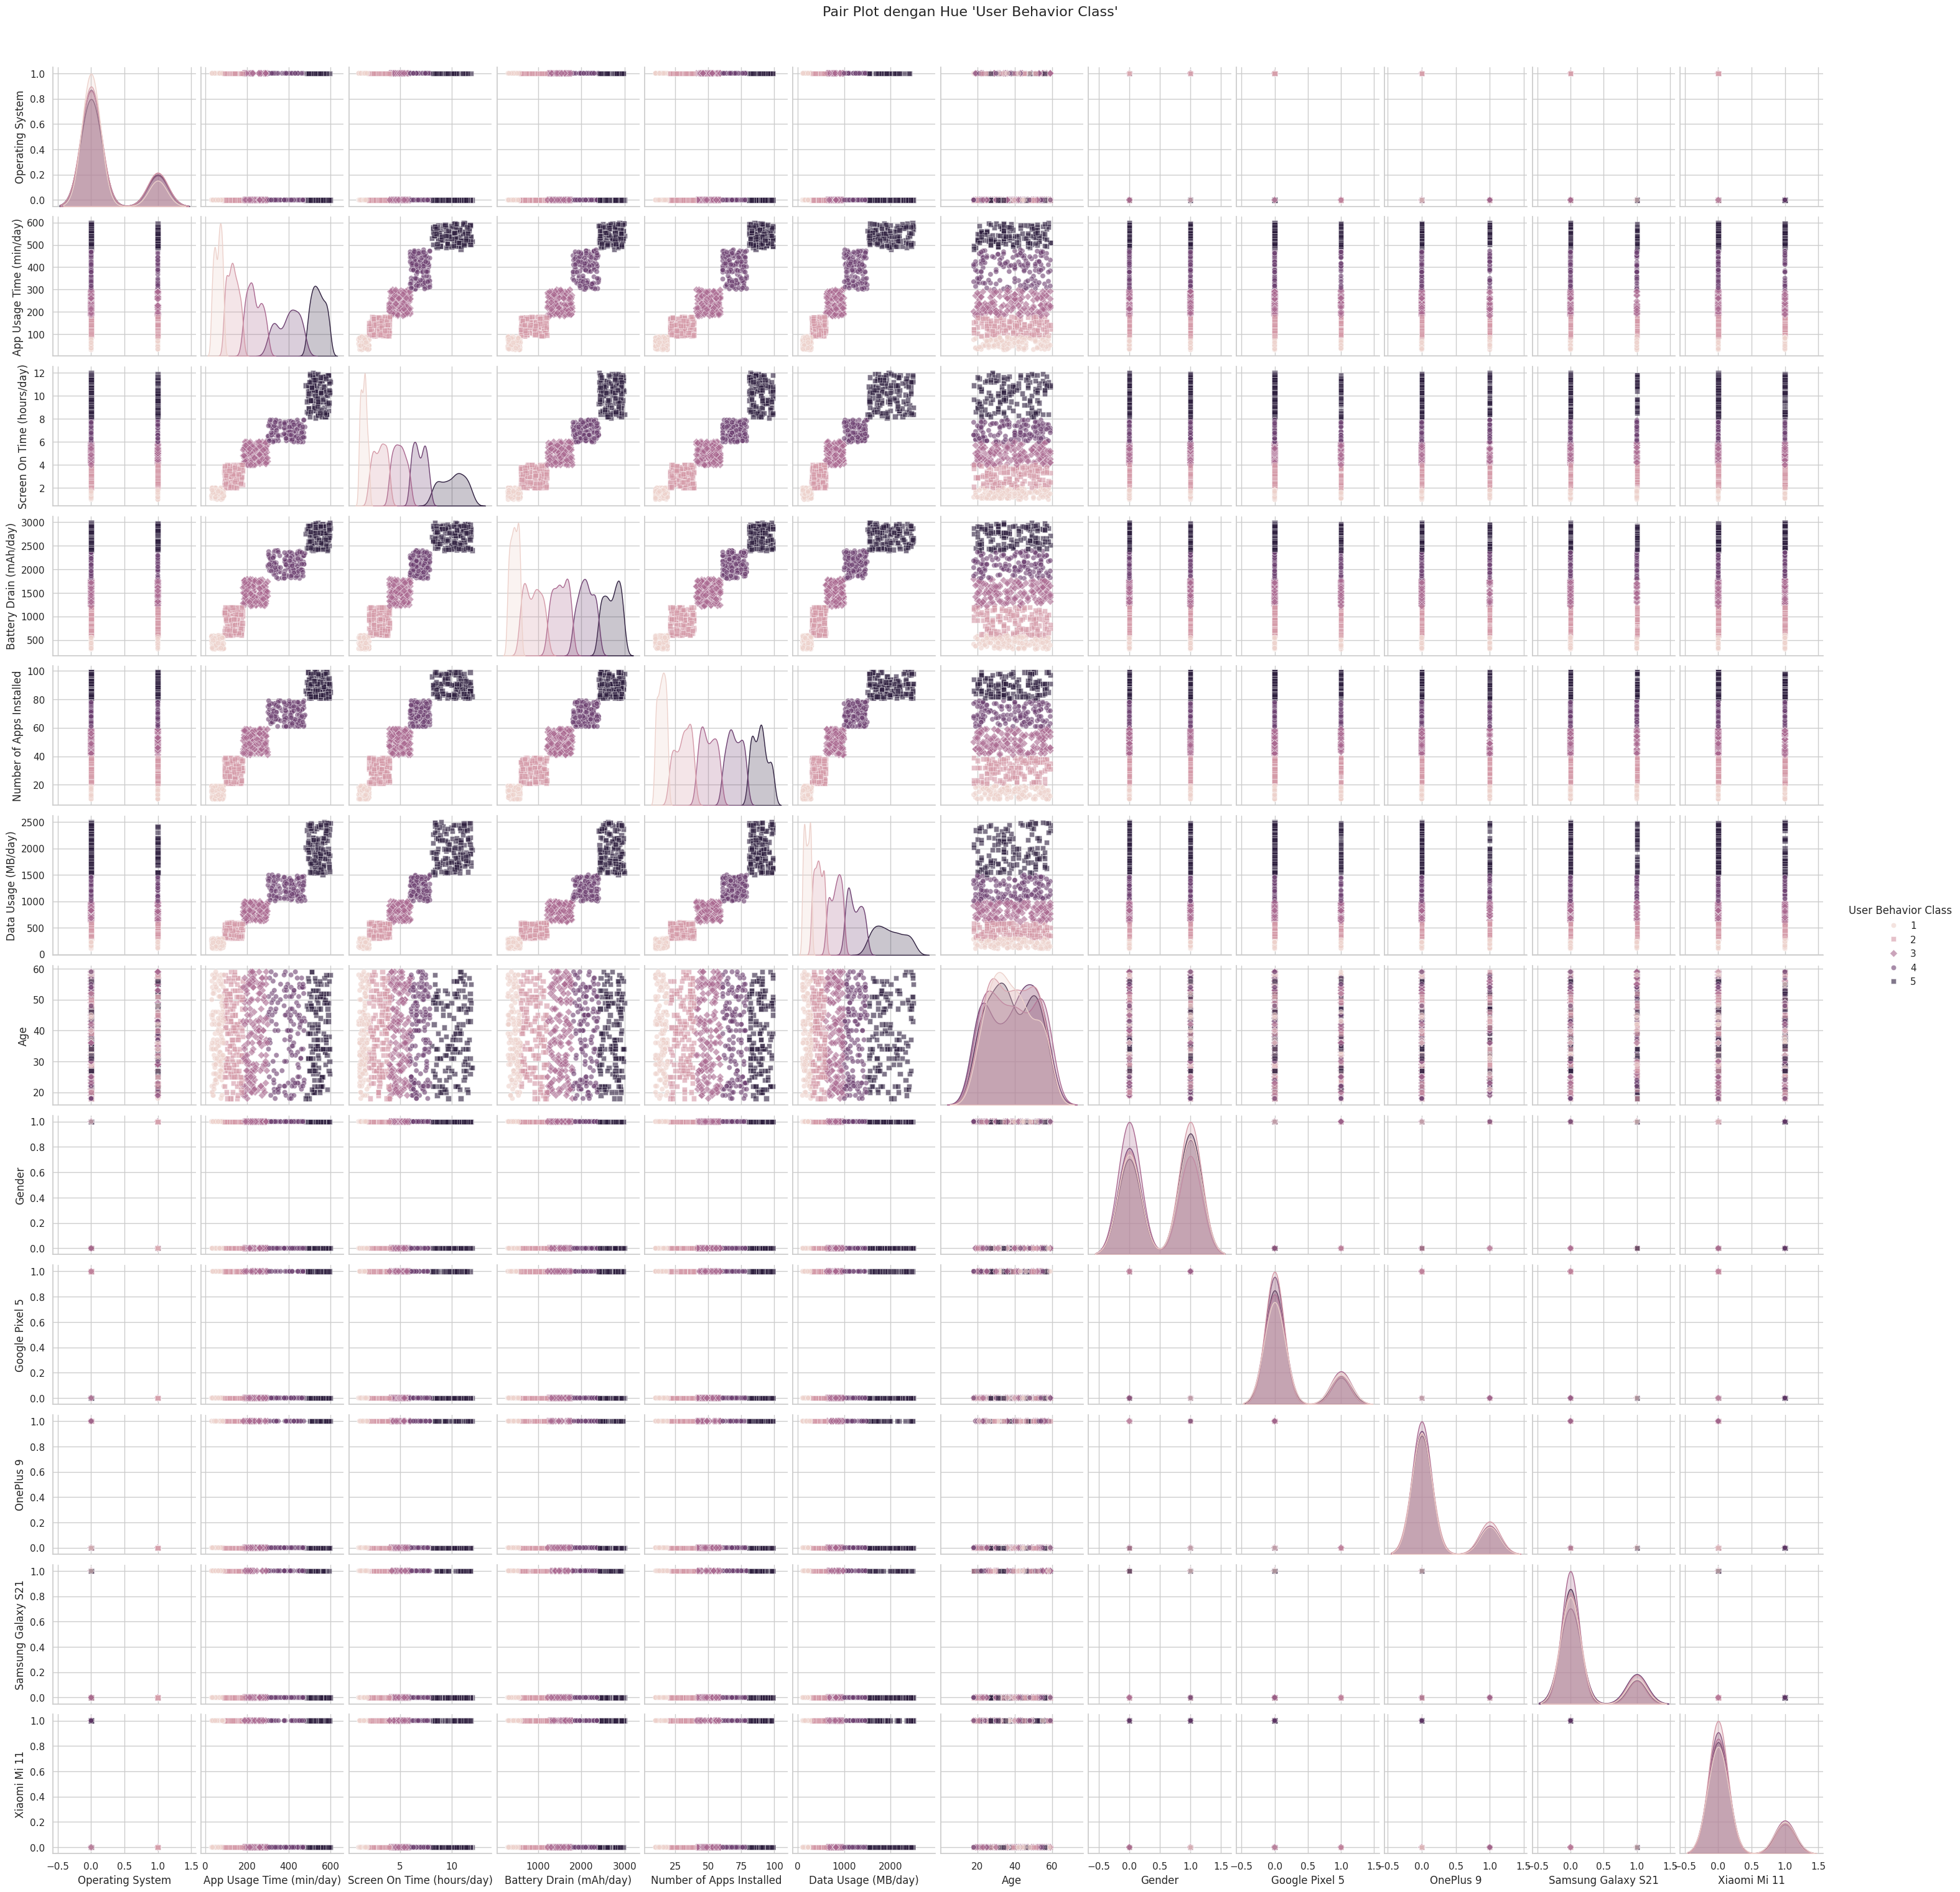

In [ ]:
# @title visualisasi pairplot
sns.set_theme(style="whitegrid", context="notebook", palette="muted")

plt.figure(figsize=(10, 8))
sns.pairplot(
    df,
    hue='User Behavior Class',  # Kolom kategori untuk warna
    diag_kind="kde",  # Distribusi menggunakan KDE
    markers=["o", "s", "D"],  # Marker untuk membedakan kategori
    plot_kws={"alpha": 0.6},  # Transparansi untuk mencegah overlap
    height=2.5  # mengatur ukuran setiap plot
)

# Menambahkan judul (opsional)
plt.suptitle("Pair Plot dengan Hue 'User Behavior Class'", y=1.02, fontsize=16)

# Menampilkan plot
plt.show()

Setelah dianalisa, diapatkan insight sebagai berikut:
1. **Operating System**: Terlihat sedikit konsentrasi kelas 1 dan 3 di bagian tengah distribusi dari fitur "Operating System". Meskipun demikian, hubungan ini tidak terlalu kuat.
   
2. **Age**: Ada sedikit indikasi bahwa kelas 2 dan 5 lebih banyak ditemukan di ujung bawah distribusi "Age", meskipun pola ini juga tidak terlalu jelas.
   
3. **Screen Size**: Tidak ada pola atau korelasi yang dapat terlihat antara "Screen Size" dengan **User Behavior Class**.
   
4. **Battery Drain**: Fitur "Battery Drain" terlihat hampir independen dari **User Behavior Class**, tanpa korelasi yang kuat.
   
5. **Number of Apps Installed**: Ada sedikit indikasi bahwa kelas 2 lebih sering muncul di rentang atas distribusi "Number of Apps Installed".
   
6. **Data Usage Efficiency**: Distribusi "Data Usage Efficiency" antar **User Behavior Class** tampaknya acak tanpa pola yang jelas.

#5. feature engineering

In [ ]:
# @title memisahkan  atribut independen(x) dan dependen(y)
x = df.drop(columns='User Behavior Class')
y = df['User Behavior Class']

saya memisahkan fitur independen(x) dan dependen(y)

In [ ]:
# @title train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train - 1
y_test = y_test - 1
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 12)
(140, 12)
(560,)
(140,)


spliting dataset

In [ ]:
# @title normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Normalisasi dengan MinMaxScaler untuk fitur independen


=== Decision Tree ===
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



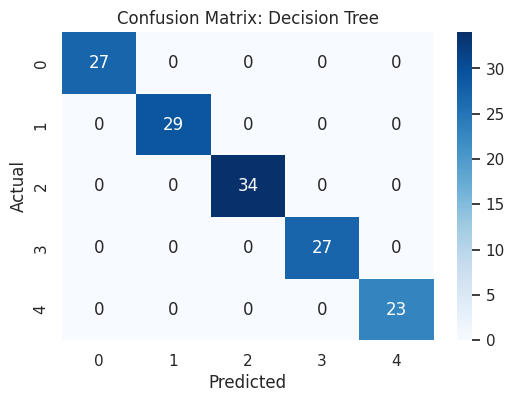


=== Random Forest ===
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



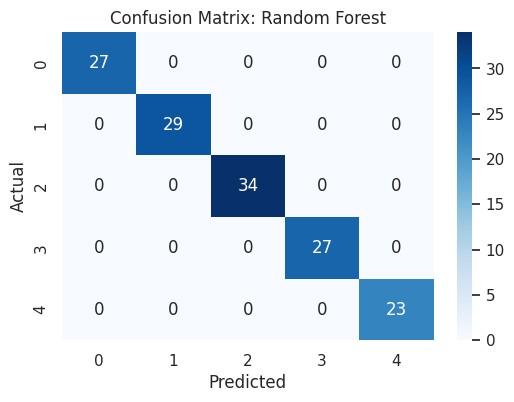


=== K-Nearest Neighbors ===
Akurasi: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.81      1.00      0.89        29
           2       0.97      0.85      0.91        34
           3       1.00      0.96      0.98        27
           4       1.00      1.00      1.00        23

    accuracy                           0.94       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.94      0.94       140



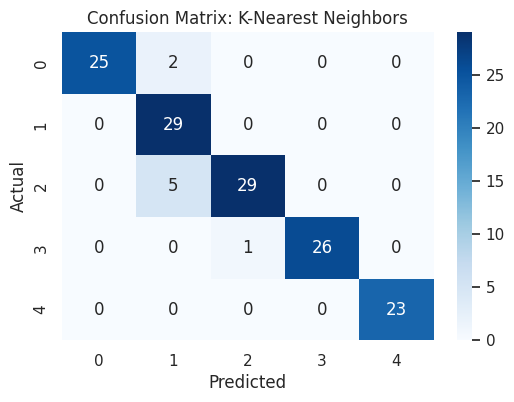


=== Support Vector Machine (SVM) ===
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



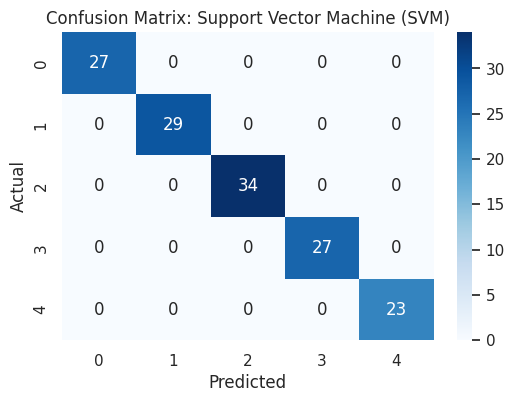


=== Logistic Regression ===
Akurasi: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.90      0.97      0.93        29
           2       0.97      0.91      0.94        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           0.97       140
   macro avg       0.97      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



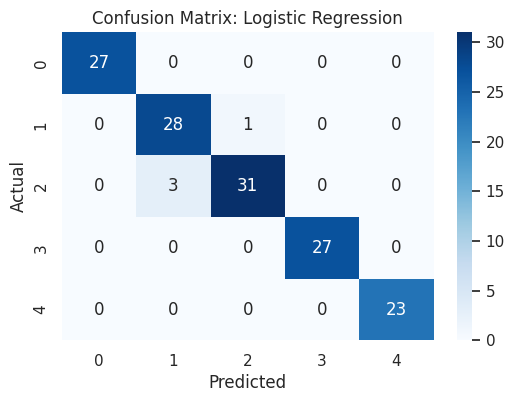


=== Naive Bayes ===
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



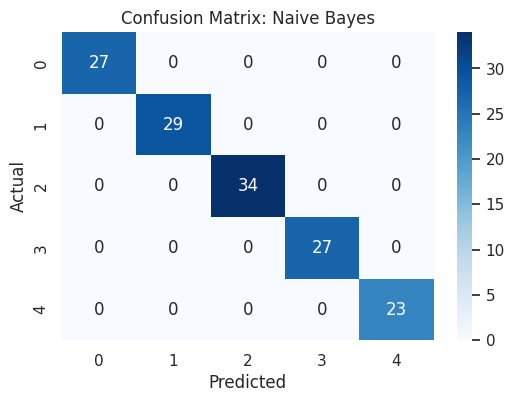


=== Gradient Boosting ===
Akurasi: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



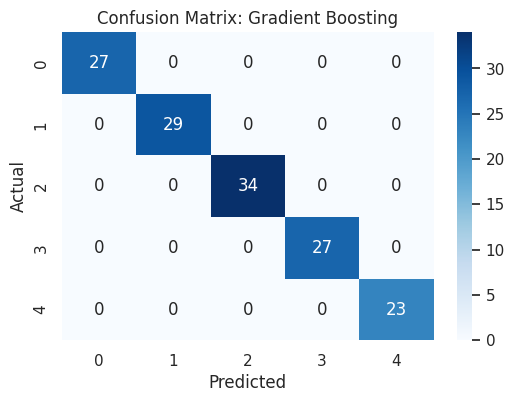


=== XGBoost ===
Akurasi: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       0.96      1.00      0.98        27
           4       1.00      0.96      0.98        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



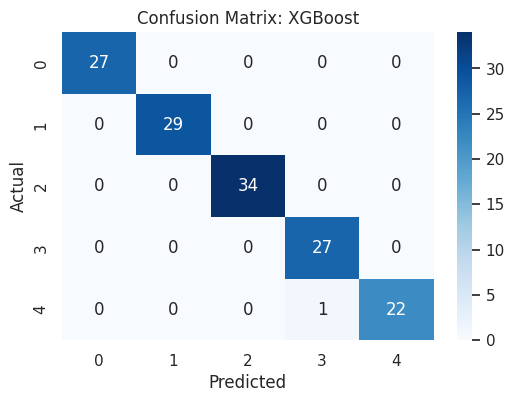


=== AdaBoost ===
Akurasi: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.32      1.00      0.49        29
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        27
           4       1.00      1.00      1.00        23

    accuracy                           0.56       140
   macro avg       0.46      0.60      0.50       140
weighted avg       0.42      0.56      0.46       140



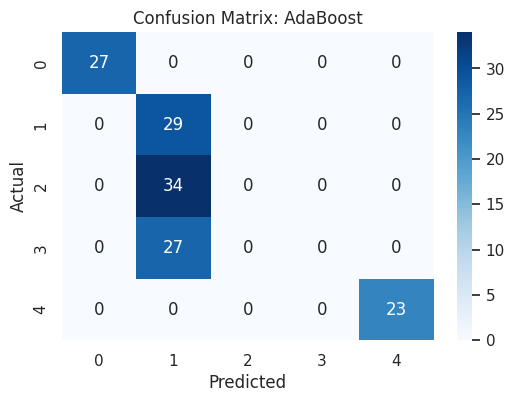


Ringkasan Hasil:
                          Model  Accuracy
0                 Decision Tree  1.000000
1                 Random Forest  1.000000
2           K-Nearest Neighbors  0.942857
3  Support Vector Machine (SVM)  1.000000
4           Logistic Regression  0.971429
5                   Naive Bayes  1.000000
6             Gradient Boosting  1.000000
7                       XGBoost  0.992857
8                      AdaBoost  0.564286

=== Hasil Prediksi dan Aktual: Decision Tree ===
     Actual  Predicted
158       3          3
500       0          0
396       0          0
155       1          1
321       2          2

=== Hasil Prediksi dan Aktual: Random Forest ===
     Actual  Predicted
158       3          3
500       0          0
396       0          0
155       1          1
321       2          2

=== Hasil Prediksi dan Aktual: K-Nearest Neighbors ===
     Actual  Predicted
158       3          3
500       0          0
396       0          0
155       1          1
321       2    

In [ ]:
# @title Modeling menggunakan 9 model berbeda untuk mengentahui model terbaik untuk kasus ini
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Menyimpan hasil evaluasi
results = []
predictions = {}

for name, model in models.items():
    print(f"\n=== {name} ===")

    # Melatih model
    model.fit(x_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(x_test)

    # Menyimpan prediksi dan aktual
    predictions[name] = pd.DataFrame({
        "Actual": y_test,
        "Predicted": y_pred
    })

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {acc:.2f}")

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil untuk analisis lebih lanjut
    results.append({"Model": name, "Accuracy": acc})

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
results_df = pd.DataFrame(results)
print("\nRingkasan Hasil:")
print(results_df)

# Menampilkan prediksi dan aktual untuk tiap model
for model_name, df in predictions.items():
    print(f"\n=== Hasil Prediksi dan Aktual: {model_name} ===")
    print(df.head())

Menggunakan 9 algoritma machine learning, saya membandingkan peforma mereka dan setelah melakukan evaluasi terhadap berbagai model seperti **Decision Tree**, **Random Forest**, **Gradient Boosting**, dan **XGBoost**, didapatkan bahwa model **Random Forest** dan **XGBoost** memiliki performa terbaik dalam memprediksi kelas perilaku pengguna. Kedua model ini menunjukkan hasil yang lebih stabil dan akurat dalam klasifikasi dibandingkan dengan model lainnya seperti **K-Nearest Neighbors** dan **Naive Bayes**, yang tidak mendukung **feature importance** dan memberikan performa yang lebih rendah.



=== Decision Tree ===
Mean Accuracy: 1.0000
Standard Deviation: 0.0000

=== Random Forest ===
Mean Accuracy: 1.0000
Standard Deviation: 0.0000

=== K-Nearest Neighbors ===
Mean Accuracy: 0.9179
Standard Deviation: 0.0154

=== Support Vector Machine (SVM) ===
Mean Accuracy: 1.0000
Standard Deviation: 0.0000

=== Logistic Regression ===
Mean Accuracy: 0.9661
Standard Deviation: 0.0067

=== Naive Bayes ===
Mean Accuracy: 1.0000
Standard Deviation: 0.0000

=== Gradient Boosting ===
Mean Accuracy: 1.0000
Standard Deviation: 0.0000

=== XGBoost ===
Mean Accuracy: 0.9946
Standard Deviation: 0.0071

=== AdaBoost ===
Mean Accuracy: 0.7232
Standard Deviation: 0.0985

Ringkasan Hasil Cross-Validation:
                          Model  Mean Accuracy  Standard Deviation
0                 Decision Tree       1.000000            0.000000
1                 Random Forest       1.000000            0.000000
2           K-Nearest Neighbors       0.917857            0.015361
3  Support Vector Machine (SVM)

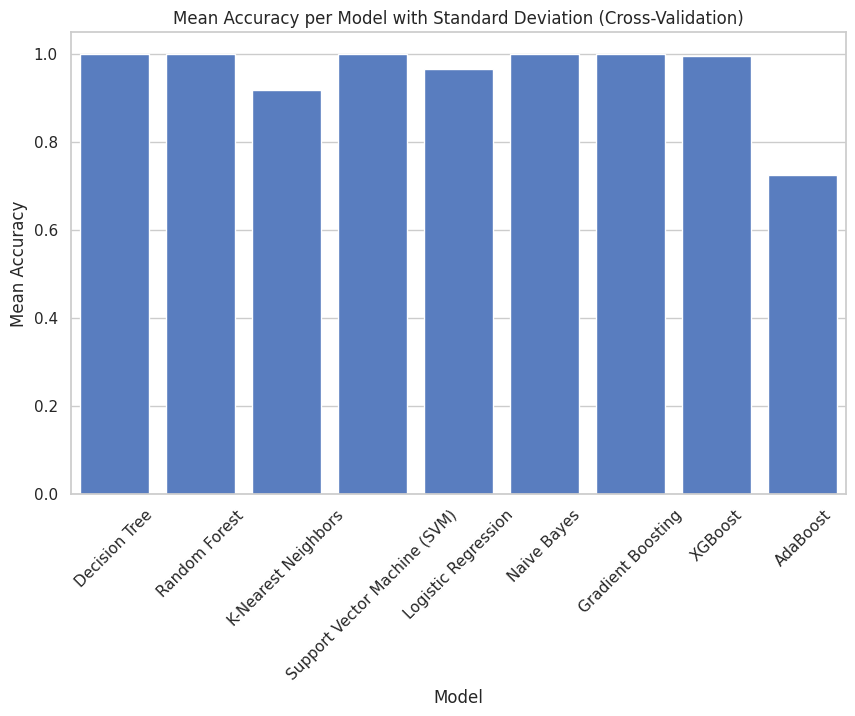

In [ ]:
# @title cross validation
from sklearn.model_selection import cross_val_score

results_cv = []

# Cross-validation untuk setiap model
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

    # Menghitung rata-rata dan deviasi standar
    mean_accuracy = np.mean(cv_scores)
    std_dev = np.std(cv_scores)

    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")
    results_cv.append({"Model": name, "Mean Accuracy": mean_accuracy, "Standard Deviation": std_dev})
results_df_cv = pd.DataFrame(results_cv)

print("\nRingkasan Hasil Cross-Validation:")
print(results_df_cv)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Mean Accuracy", data=results_df_cv, ci="sd")
plt.title("Mean Accuracy per Model with Standard Deviation (Cross-Validation)")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Mean Accuracy")
plt.show()

Selanjutnnya saya melakukan cross-validation untuk mengenathui apakah model nya overfiting atau tidak, dan didapatkan hasil berikut:
Model dengan **mean accuracy** yang sangat tinggi dan **standard deviation** yang rendah, seperti **Decision Tree**, **Random Forest**, **SVM**, **Naive Bayes**, dan **Gradient Boosting**, menunjukkan stabilitas yang baik dan tidak cenderung overfitting. Sebaliknya, model **AdaBoost** dengan **standard deviation** yang cukup tinggi menunjukkan adanya variabilitas yang lebih besar dalam kinerjanya.


=== Feature Importance untuk Model: Decision Tree ===
                      Feature  Importance
0     Battery Drain (mAh/day)    0.498315
1  Screen On Time (hours/day)    0.251756
2    App Usage Time (min/day)    0.249929
3                Xiaomi Mi 11    0.000000
4          Samsung Galaxy S21    0.000000
5                   OnePlus 9    0.000000
6              Google Pixel 5    0.000000
7                      Gender    0.000000
8                         Age    0.000000
9         Data Usage (MB/day)    0.000000


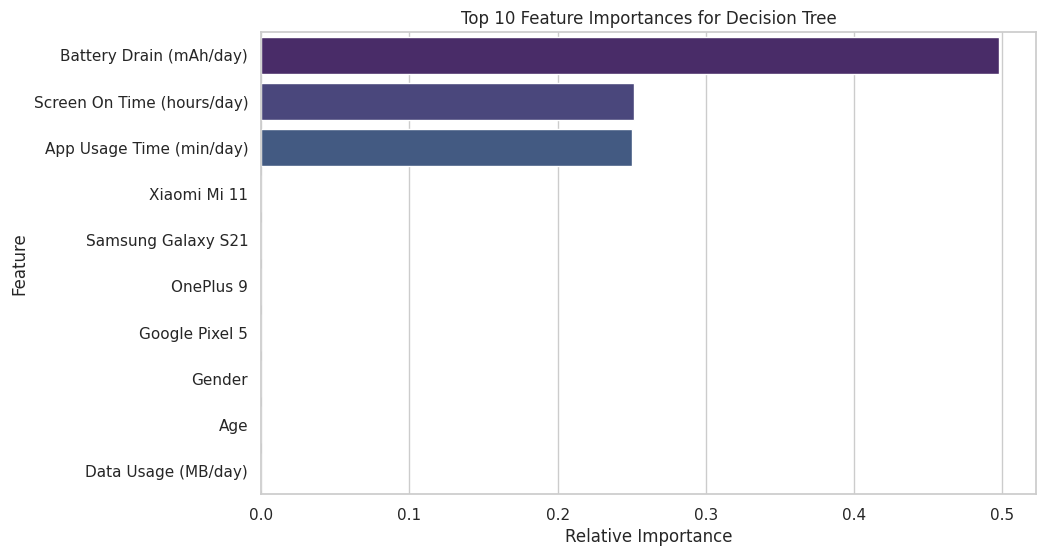


=== Feature Importance untuk Model: Random Forest ===
                      Feature  Importance
0    Number of Apps Installed    0.261983
1         Data Usage (MB/day)    0.213898
2     Battery Drain (mAh/day)    0.191424
3    App Usage Time (min/day)    0.187246
4  Screen On Time (hours/day)    0.139454
5                         Age    0.002679
6          Samsung Galaxy S21    0.001020
7              Google Pixel 5    0.000717
8                      Gender    0.000701
9                Xiaomi Mi 11    0.000357


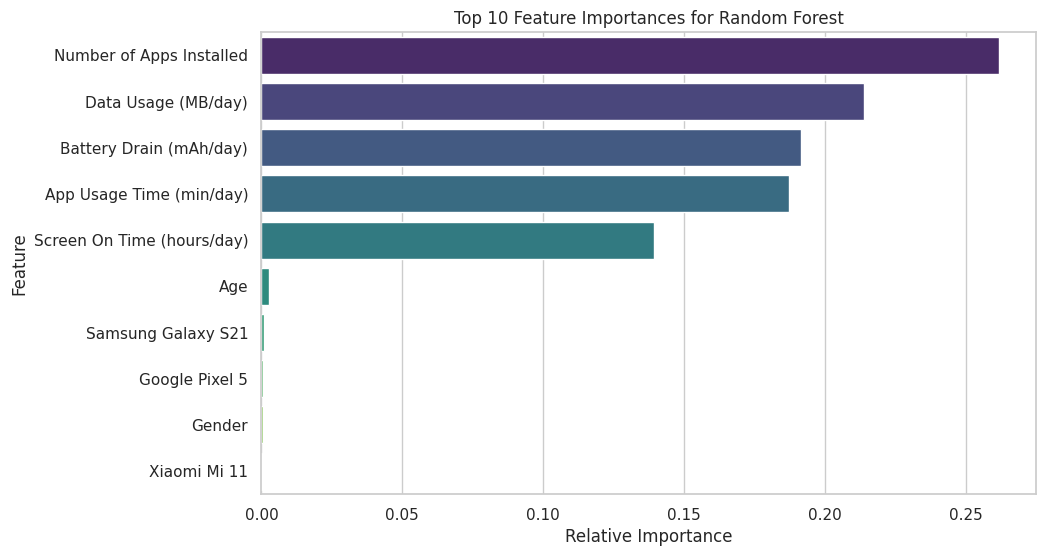


=== Feature Importance untuk Model: K-Nearest Neighbors ===
Model K-Nearest Neighbors tidak mendukung feature_importances_.

=== Feature Importance untuk Model: Support Vector Machine (SVM) ===
Model Support Vector Machine (SVM) tidak mendukung feature_importances_.

=== Feature Importance untuk Model: Logistic Regression ===
Model Logistic Regression tidak mendukung feature_importances_.

=== Feature Importance untuk Model: Naive Bayes ===
Model Naive Bayes tidak mendukung feature_importances_.

=== Feature Importance untuk Model: Gradient Boosting ===
                      Feature    Importance
0    App Usage Time (min/day)  2.661321e-01
1    Number of Apps Installed  2.592385e-01
2         Data Usage (MB/day)  2.506357e-01
3     Battery Drain (mAh/day)  1.889333e-01
4  Screen On Time (hours/day)  3.506043e-02
5                         Age  3.186840e-16
6                Xiaomi Mi 11  0.000000e+00
7          Samsung Galaxy S21  0.000000e+00
8                   OnePlus 9  0.000000e+00

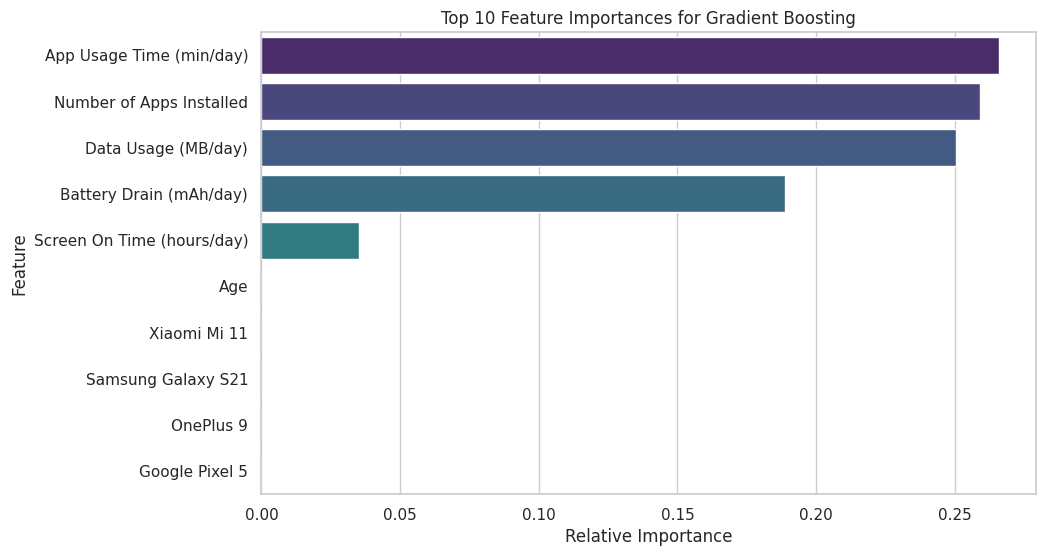


=== Feature Importance untuk Model: XGBoost ===
                      Feature  Importance
0     Battery Drain (mAh/day)    0.360064
1    App Usage Time (min/day)    0.322220
2    Number of Apps Installed    0.316451
3         Data Usage (MB/day)    0.000604
4  Screen On Time (hours/day)    0.000574
5                      Gender    0.000051
6                         Age    0.000036
7                Xiaomi Mi 11    0.000000
8          Samsung Galaxy S21    0.000000
9                   OnePlus 9    0.000000


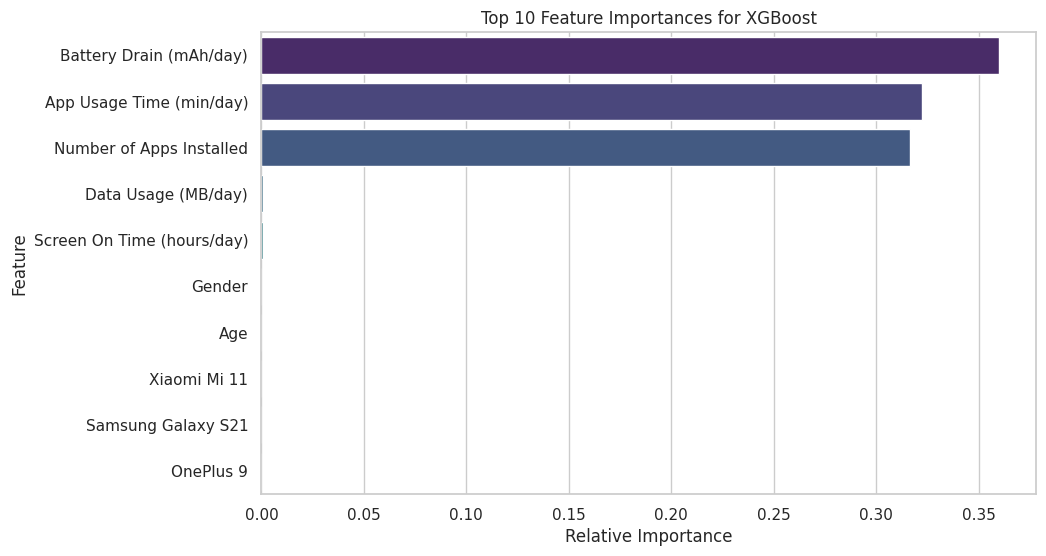


=== Feature Importance untuk Model: AdaBoost ===
                      Feature  Importance
0         Data Usage (MB/day)        0.26
1    Number of Apps Installed        0.22
2  Screen On Time (hours/day)        0.20
3    App Usage Time (min/day)        0.18
4     Battery Drain (mAh/day)        0.14
5                Xiaomi Mi 11        0.00
6          Samsung Galaxy S21        0.00
7                   OnePlus 9        0.00
8              Google Pixel 5        0.00
9                      Gender        0.00


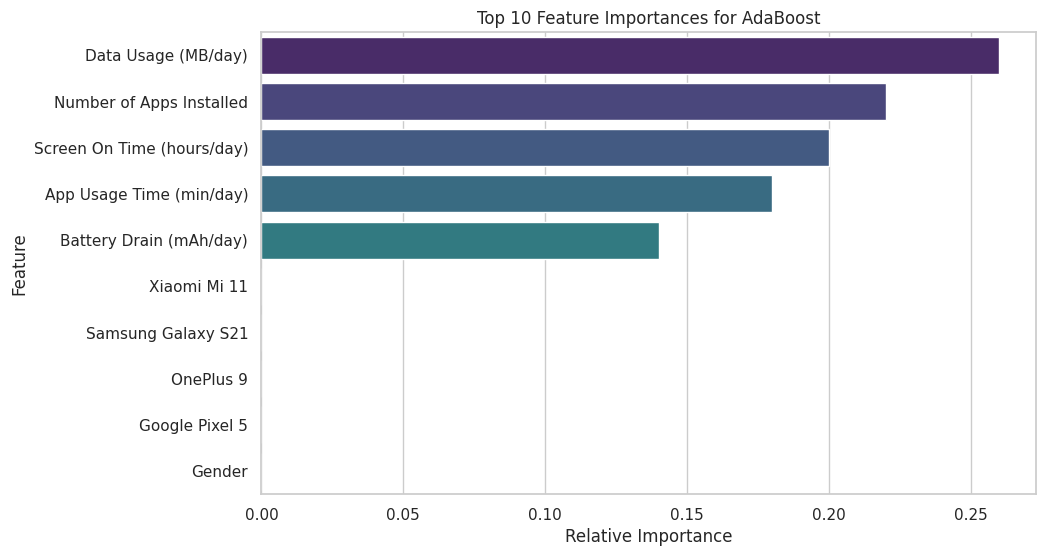

In [ ]:
def plot_feature_importance_all_models(models, x_train, y_train, top_n=10):
    if isinstance(x_train, np.ndarray):
        raise ValueError("x_train harus berupa DataFrame dengan nama kolom untuk menampilkan feature importance.")

    for name, model in models.items():
        print(f"\n=== Feature Importance untuk Model: {name} ===")
        # Latih model
        model.fit(x_train, y_train)

        # Cek apakah model mendukung feature_importances_
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1][:top_n]

            # Buat DataFrame feature importance
            feature_importance_df = pd.DataFrame({
                "Feature": x_train.columns[indices],
                "Importance": importances[indices]
            })

            # Tampilkan DataFrame
            print(feature_importance_df)

            # Visualisasi
            plt.figure(figsize=(10, 6))
            sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
            plt.title(f"Top {top_n} Feature Importances for {name}")
            plt.xlabel("Relative Importance")
            plt.ylabel("Feature")
            plt.show()
        else:
            print(f"Model {name} tidak mendukung feature_importances_.")
feature_names = x.columns
x_train = pd.DataFrame(x_train, columns=feature_names)

plot_feature_importance_all_models(models, x_train, y_train, top_n=10)

Terakhir adalah melakukan Feature Importance untuk mengidentifikasi fitur mana yang paling berpengaruh pada prediksi, dan didapatkan hasil sebagai berikut:
- **Fitur yang paling berpengaruh** di semua model yang mendukung **feature_importances_** adalah fitur terkait dengan penggunaan perangkat, seperti **jumlah aplikasi yang diinstal**, **waktu penggunaan aplikasi**, dan **drainase baterai**. Hal ini menunjukkan bahwa model-model ini mengandalkan perilaku pengguna sehari-hari dalam menentukan kategori penggunaan perangkat.
- **Fitur yang kurang penting** adalah **gender**, **age**, dan **jenis perangkat**, yang tampaknya tidak berperan signifikan dalam prediksi kategori penggunaan perangkat.
- Model-model seperti **KNN**, **SVM**, **Logistic Regression**, dan **Naive Bayes** tidak mendukung fitur **feature_importances_**, tetapi mereka masih dapat digunakan untuk klasifikasi berdasarkan pola yang lebih kompleks antar fitur.